<img src="https://www.dailyesports.gg/wp-content/uploads/2019/10/League-of-Legends-Senna-Feature.png" alt="Drawing" style="width: 700px;"/>

<br>

# League of Legends 

<b>About this Dataset: </b> [League of Legends](https://en.wikipedia.org/wiki/League_of_Legends) (LoL) is a 2009 multiplayer online battle arena video game developed and published by Riot Games.

In the game, two teams of five players battle in player versus player combat, each team occupying and defending their half of the map. Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play. During a match, champions become more powerful by collecting experience points, earning gold, and purchasing items to defeat the opposing team. In the game's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "Nexus", a large structure located within [<sup id="fn1-back">1</sup>](#fn1).

<hr>

### Table Descriptions:
- `Name`: Name of the champion
- `Class`: Fighter, Assassin, Mage, Marksman, Controller, or Tank
- `Role`: Top, Mid, ADC, Support, or Jungle
- `Tier`: S+, S, A, B, C, or D
- `Score`: Overall score of the champion
- `Trend`: Trend of the score
- `Win %`: Win rate of the champion
- `Role %`: Role rate played with the champion
- `Pick %`: Pick rate of the champion
- `Ban %`: Ban rate of the champion
- `KDA`: Kill/Death/Assist ratio of the champion (but in this dataset it will be (Kill+Assist)/Death)

#### Class Descriptions: [<sup id="fn2-back">2</sup>](#fn2)
- **Fighter:** Otherwise known as bruisers, fighters excel in close-combat, being able to deal tons of damage and take their fair share of it as well.
- **Assassin:** Also known as slayers are, by and afar, the class with the highest damage potency and mobility in the game. They excel at accessing priority targets and killing them efficiently, along with often getting themselves out of harms’ way in the process.
- **Mage:** The most noteworthy trait of a mage is that they cast spells, often requiring large mana pools in order to do so effectively over the course of a fight. Very rarely do they rely on their basic attack, instead using spells to deal damage, lock enemies down, and secure objectives.
- **Marksman:** The signature trait of a marksman is their ability to deal damage primarily through basic attacks, with abilities often existing solely to enable such. 
- **Controller:** They are champions whose primary job is to assist allies in securing kills and objectives. As a result, many of the champions in this category are typically played in the support role, occasionally flexing into the middle lane when needed.
- **Tank:** Tanks, while often lacking on the offensive front, are able to take plenty of hits and apply huge amounts of disabling crowd control effects. They excel at surviving burst damage, but often fall victim to onslaughts of consistent damage.

#### Lane/Role Descriptions: [<sup id="fn3-back">3</sup>](#fn3)
- **Top:** The Top Laner is assigned to the top lane. They need to have high survivability, and high damage or engages.
- **Mid:** The Mid Laner is assigned to the middle lane. They need to have a high burst damage.
- **ADC (Bottom Lane):** The ADC (aka Bottom Carry) is assigned to the bottom lane, and is the most vulnerable. It's important that the champion aquires as much gold as possible to purchase key items that will greatly increase their fighting potential. They are highly dependant on item-based power spikes.
- **Support:** The Support is one of the two champions assigned to the ADC (bottom lane); their initial goal is to assist their more vulnerable team mate through the earliest stages of the game.
- **Jungle:** The Jungler is the champion assigned to the jungle. They need to be able to clear out jungle camps without too much difficulty and ambush other champions in lane.

<h4 align = 'center'>Order of Tier & Score:</h4>

<table>
    <tr>
        <th>Tier</th>
        <th>Score</th>
    </tr>
    <tr>
        <td>S+</td>
        <td>72.51 - 100.00</td>
    </tr>
    <tr>
        <td>S</td>
        <td>57.04 - 72.50</td>
    </tr>
    <tr>
        <td>A</td>
        <td>47.18 - 57.03</td>
    </tr>
    <tr>
        <td>B</td>
        <td>40.54 - 47.17</td>
    </tr>
    <tr>
        <td>C</td>
        <td>34.26 - 40.53</td>
    </tr>
    <tr>
        <td>D</td>
        <td>0.00 - 34.25</td>
    </tr>
</table>

<br>
<br>
<br>

<hr>

Other than the dataset and column description [<sup id="fn4-back">4</sup>](#fn4), as well as the description above, the tasks, descriptions under the tasks, and the summaries are all written and created by me.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, iqr, chi2_contingency, f_oneway

#### Patches for Season 12:

In [61]:
#12.1

lol_1 = pd.read_csv('league_of_legends_12.1patch.csv')
lol_1.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23


In [62]:
#12.2

lol_2 = pd.read_csv('league_of_legends_12.2patch.csv')
lol_2.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97%,94.09%,4.33%,1.97%,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71%,93.24%,4.56%,1.04%,2.55
2,Akali,Assassin,TOP,S+,87.73,29.87,49.70%,44.38%,6.19%,21.71%,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85%,55.40%,8.26%,21.71%,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94%,59.70%,4.86%,23.10%,2.28


In [63]:
#12.3

lol_3 = pd.read_csv('league_of_legends_12.3patch.csv')
lol_3.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,59.99,4.88,48.06%,92.58%,5.03%,2.15%,1.87
1,Ahri,Mage,MID,S+,95.22,39.37,53.40%,94.04%,15.29%,8.93%,2.59
2,Akali,Assassin,TOP,S,74.79,-12.94,48.48%,41.25%,5.10%,20.26%,2.08
3,Akali,Assassin,MID,S,64.77,-9.81,49.10%,58.10%,7.51%,20.26%,2.33
4,Akshan,Marksman,MID,A,54.42,-9.08,50.75%,59.43%,4.14%,18.73%,2.18


In [64]:
#12.4

lol_4 = pd.read_csv('league_of_legends_12.4patch.csv')
lol_4.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S+,78.29,18.31,50.10%,93.41%,7.38%,3.31%,1.94
1,Ahri,Mage,MID,S+,92.72,-2.50,51.62%,95.11%,13.98%,12.61%,2.54
2,Akali,Assassin,TOP,A,48.25,-26.55,48.07%,27.03%,3.21%,18.30%,2.03
3,Akali,Assassin,MID,S,73.23,8.46,49.98%,72.36%,9.31%,18.30%,2.32
4,Akshan,Marksman,MID,A,51.30,-3.12,49.25%,66.41%,4.44%,15.90%,2.14


#### <hr>

### Tasks: <a id = 'tasks'></a>

#### 1. Differences in Four Patches in Season 12:
1. [What do the Classes, Roles, and Tiers look like?](#question_1.1)
2. [Of all the champions, which one has the highest win %?](#question_1.2)
3. [What is the Pick % to the Ban % for the Assassin Class?](#question_1.3)
4. [What are the top 10 champions based on their Score, and what does the previous trends look like?](#question_1.4)
5. [For the top 10 champions based on Score, what are their Win %, and their Ban %?](#question_1.5)
6. [What proportion of champions are Marksman or Mage as a Mid Laner?](#question_1.6)
7. [What proportion of champions are in Fighter or Controller and in Top Lane, have a Win % of 45% or more?](#question_1.7)

#### 2. Champions in the Newest Patch (12.4):
1. [Does Lux have a higher Win % in the Mid or Support Lane?](#question_2.1)
2. [Of Akali's overall Pick %, which are in the Top Lane, and which are in the Mid Lane?](#question_2.2)
3. [What is the Pick % of Alistar compared to his Ban %?](#question_2.3)
4. [Of Akshan's overall Role %, what proportion is Top Lane and Mid Lane?](#question_2.4)
5. [What does Ekko have a higher KDA in, Jungle Lane or Mid Lane?](#question_2.5)

#### 3. Possibilites and Assumptions:
Use patch 12.4 to answer these questions.
1. [We want to find the average KDA for all classes, and compare it to the average KDA of the Tank class.](#question_3.1)
2. [Is there an association between roles and classes?](#question_3.2)
3. [In the Support Lane, is it more likely for a Mage or Tank to be picked?](#question_3.3)
4. [We want to see if the different types of classes: Fighter, Assassin, Mage, Marksman, Controller, Tank, is better than the others based on their scores.](#question_3.4)

<br>

<hr>

# 1. Differences Throughout the Four Patches in Season 12:

## 1.1 Classes, Roles, and Tiers <a id="question_1.1"></a>

Starting out, we just want to see the breakdown of the classes, roles, and tiers throughout all four patches in season 12. Patch 12.4 is the most recent patch that has come out, with 12.3 as the next patch, and so on.

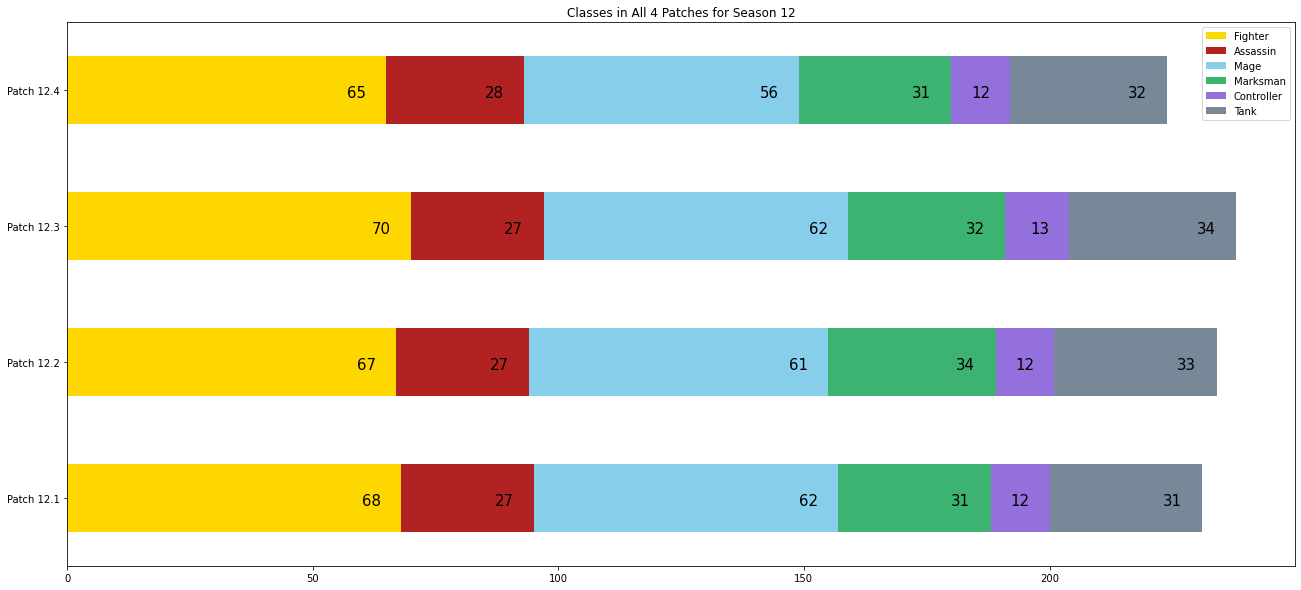

In [15]:
lol_1_fighter = len(lol_1['Class'][lol_1['Class'] == "Fighter"])
lol_1_assassin = len(lol_1['Class'][lol_1['Class'] == "Assassin"])
lol_1_mage = len(lol_1['Class'][lol_1['Class'] == "Mage"])
lol_1_marksman = len(lol_1['Class'][lol_1['Class'] == "Marksman"])
lol_1_controller = len(lol_1['Class'][lol_1['Class'] == "Controller"])
lol_1_tank = len(lol_1['Class'][lol_1['Class'] == "Tank"])

lol_2_fighter = len(lol_2['Class'][lol_2['Class'] == "Fighter"])
lol_2_assassin = len(lol_2['Class'][lol_2['Class'] == "Assassin"])
lol_2_mage = len(lol_2['Class'][lol_2['Class'] == "Mage"])
lol_2_marksman = len(lol_2['Class'][lol_2['Class'] == "Marksman"])
lol_2_controller = len(lol_2['Class'][lol_2['Class'] == "Controller"])
lol_2_tank = len(lol_2['Class'][lol_2['Class'] == "Tank"])

lol_3_fighter = len(lol_3['Class'][lol_3['Class'] == "Fighter"])
lol_3_assassin = len(lol_3['Class'][lol_3['Class'] == "Assassin"])
lol_3_mage = len(lol_3['Class'][lol_3['Class'] == "Mage"])
lol_3_marksman = len(lol_3['Class'][lol_3['Class'] == "Marksman"])
lol_3_controller = len(lol_3['Class'][lol_3['Class'] == "Controller"])
lol_3_tank = len(lol_3['Class'][lol_3['Class'] == "Tank"])

lol_4_fighter = len(lol_4['Class'][lol_4['Class'] == "Fighter"])
lol_4_assassin = len(lol_4['Class'][lol_4['Class'] == "Assassin"])
lol_4_mage = len(lol_4['Class'][lol_4['Class'] == "Mage"])
lol_4_marksman = len(lol_4['Class'][lol_4['Class'] == "Marksman"])
lol_4_controller = len(lol_4['Class'][lol_4['Class'] == "Controller"])
lol_4_tank = len(lol_4['Class'][lol_4['Class'] == "Tank"])


#---------------------------------------------------------------------------------------------

colors = ['gold', 'firebrick', 'skyblue', 'mediumseagreen', 'mediumpurple', 'lightslategray']

lol_class_df = pd.DataFrame({'Fighter': [lol_1_fighter, lol_2_fighter, lol_3_fighter, lol_4_fighter], 
                             'Assassin': [lol_1_assassin, lol_2_assassin, lol_3_assassin, lol_4_assassin], 
                             'Mage': [lol_1_mage, lol_2_mage, lol_3_mage, lol_4_mage], 
                             'Marksman': [lol_1_marksman, lol_2_marksman, lol_3_marksman, lol_4_marksman], 
                             'Controller': [lol_1_controller, lol_2_controller, lol_3_controller, lol_4_controller],
                             'Tank': [lol_1_tank, lol_2_tank, lol_3_tank, lol_4_tank]})
ax = lol_class_df.plot.barh(stacked = True, figsize = (22, 10), color = colors)

for rowNum,row in lol_class_df.iterrows():
    xpos = 0
    for val in row:
        xpos += val
        ax.text(xpos - 8, rowNum - 0.05, str(val), color='black', size = 15)
    xpos = 0

ax.set_title("Classes in All 4 Patches for Season 12")
ax.set_yticks(range(4))
ax.set_yticklabels(["Patch 12.1", "Patch 12.2", "Patch 12.3", "Patch 12.4"])

plt.savefig("all_classes_all_patches.png")
plt.show()


This graph just breaks down all the champion classes in the 4 patches in current season (Season 12).

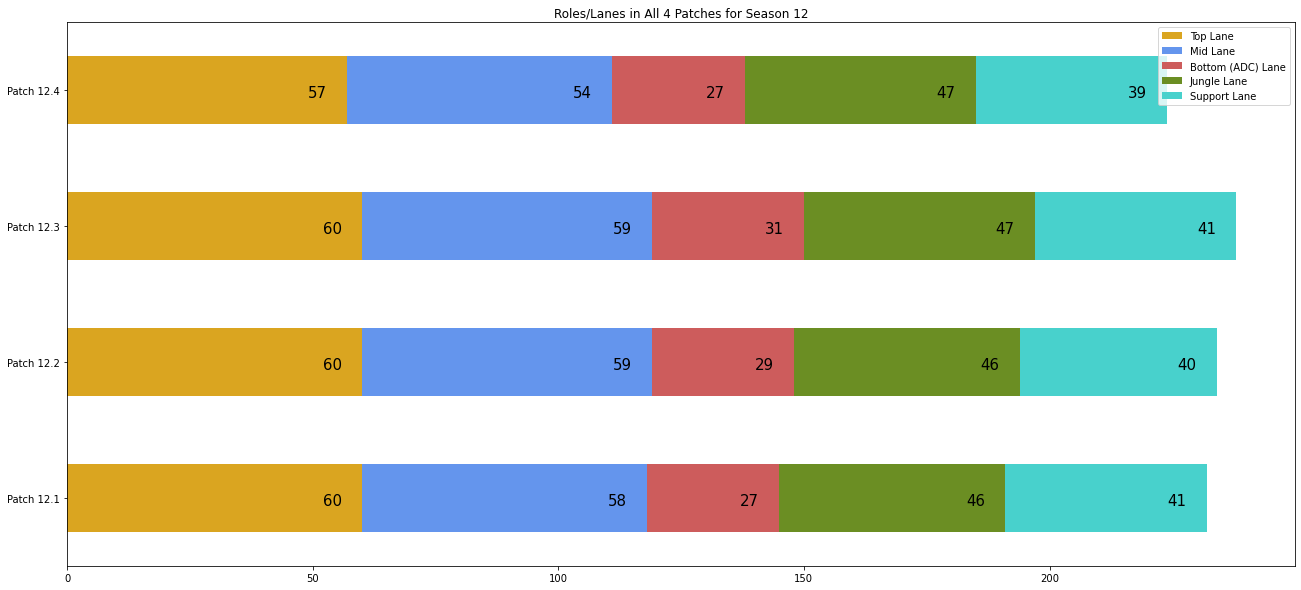

In [16]:
lol_1_top = len(lol_1['Role'][lol_1['Role'] == 'TOP'])
lol_1_mid = len(lol_1['Role'][lol_1['Role'] == 'MID'])
lol_1_adc = len(lol_1['Role'][lol_1['Role'] == 'ADC'])
lol_1_jungle = len(lol_1['Role'][lol_1['Role'] == 'JUNGLE'])
lol_1_support = len(lol_1['Role'][lol_1['Role'] == 'SUPPORT'])

lol_2_top = len(lol_2['Role'][lol_2['Role'] == 'TOP'])
lol_2_mid = len(lol_2['Role'][lol_2['Role'] == 'MID'])
lol_2_adc = len(lol_2['Role'][lol_2['Role'] == 'ADC'])
lol_2_jungle = len(lol_2['Role'][lol_2['Role'] == 'JUNGLE'])
lol_2_support = len(lol_2['Role'][lol_2['Role'] == 'SUPPORT'])

lol_3_top = len(lol_3['Role'][lol_3['Role'] == 'TOP'])
lol_3_mid = len(lol_3['Role'][lol_3['Role'] == 'MID'])
lol_3_adc = len(lol_3['Role'][lol_3['Role'] == 'ADC'])
lol_3_jungle = len(lol_3['Role'][lol_3['Role'] == 'JUNGLE'])
lol_3_support = len(lol_3['Role'][lol_3['Role'] == 'SUPPORT'])

lol_4_top = len(lol_4['Role'][lol_4['Role'] == 'TOP'])
lol_4_mid = len(lol_4['Role'][lol_4['Role'] == 'MID'])
lol_4_adc = len(lol_4['Role'][lol_4['Role'] == 'ADC'])
lol_4_jungle = len(lol_4['Role'][lol_4['Role'] == 'JUNGLE'])
lol_4_support = len(lol_4['Role'][lol_4['Role'] == 'SUPPORT'])


#---------------------------------------------------------------------------------------------

colors = ['goldenrod', 'cornflowerblue', 'indianred', 'olivedrab', 'mediumturquoise']

lol_roles_df = pd.DataFrame({'Top Lane': [lol_1_top, lol_2_top, lol_3_top, lol_4_top], 
                             'Mid Lane': [lol_1_mid, lol_2_mid, lol_3_mid, lol_4_mid], 
                             'Bottom (ADC) Lane': [lol_1_adc, lol_2_adc, lol_3_adc, lol_4_adc], 
                             'Jungle Lane': [lol_1_jungle, lol_2_jungle, lol_3_jungle, lol_4_jungle], 
                             'Support Lane': [lol_1_support, lol_2_support, lol_3_support, lol_4_support]})
ax = lol_roles_df.plot.barh(stacked = True, figsize = (22, 10), color = colors)

for rowNum,row in lol_roles_df.iterrows():
    xpos = 0
    for val in row:
        xpos += val
        ax.text(xpos - 8, rowNum - 0.05, str(val), color='black', size = 15)
    xpos = 0

ax.set_title("Roles/Lanes in All 4 Patches for Season 12")
ax.set_yticks(range(4))
ax.set_yticklabels(["Patch 12.1", "Patch 12.2", "Patch 12.3", "Patch 12.4"])

plt.savefig("all_roles_all_patches.png")
plt.show()


This graph just breaks down the different roles/lanes in all four patches in the current season (Season 12).

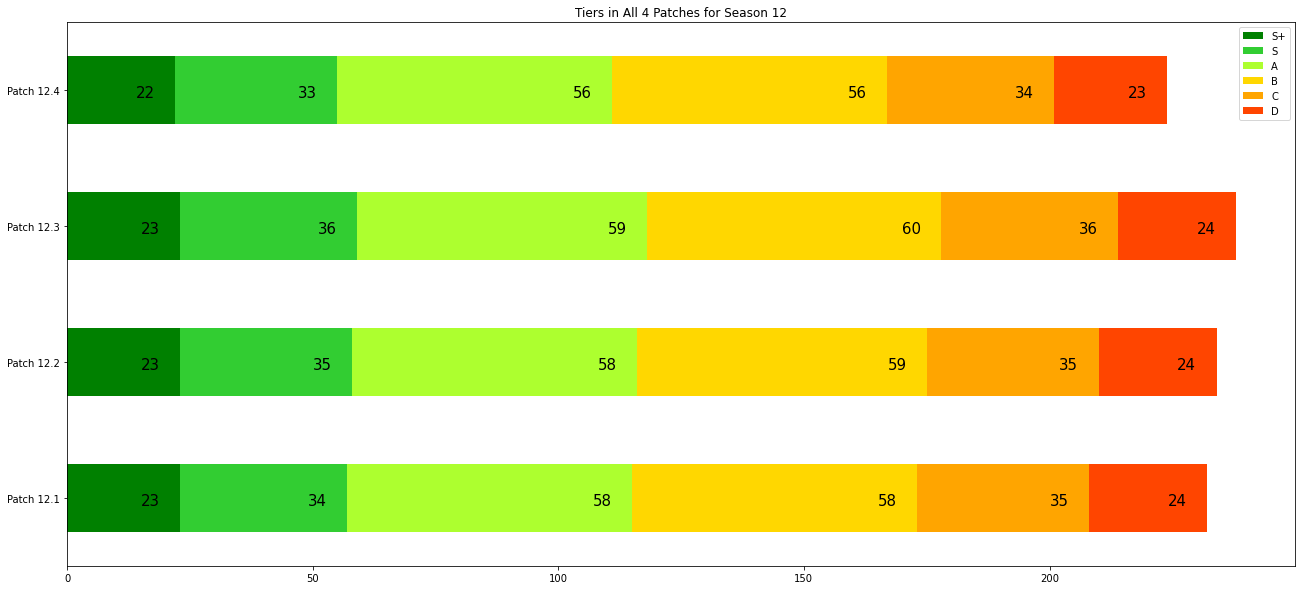

In [17]:
lol_1_splus = len(lol_1['Tier'][lol_1['Tier'] == 'S+'])
lol_1_s = len(lol_1['Tier'][lol_1['Tier'] == 'S'])
lol_1_a = len(lol_1['Tier'][lol_1['Tier'] == 'A'])
lol_1_b = len(lol_1['Tier'][lol_1['Tier'] == 'B'])
lol_1_c = len(lol_1['Tier'][lol_1['Tier'] == 'C'])
lol_1_d = len(lol_1['Tier'][lol_1['Tier'] == 'D'])

lol_2_splus = len(lol_2['Tier'][lol_2['Tier'] == 'S+'])
lol_2_s = len(lol_2['Tier'][lol_2['Tier'] == 'S'])
lol_2_a = len(lol_2['Tier'][lol_2['Tier'] == 'A'])
lol_2_b = len(lol_2['Tier'][lol_2['Tier'] == 'B'])
lol_2_c = len(lol_2['Tier'][lol_2['Tier'] == 'C'])
lol_2_d = len(lol_2['Tier'][lol_2['Tier'] == 'D'])

lol_3_splus = len(lol_3['Tier'][lol_3['Tier'] == 'S+'])
lol_3_s = len(lol_3['Tier'][lol_3['Tier'] == 'S'])
lol_3_a = len(lol_3['Tier'][lol_3['Tier'] == 'A'])
lol_3_b = len(lol_3['Tier'][lol_3['Tier'] == 'B'])
lol_3_c = len(lol_3['Tier'][lol_3['Tier'] == 'C'])
lol_3_d = len(lol_3['Tier'][lol_3['Tier'] == 'D'])

lol_4_splus = len(lol_4['Tier'][lol_4['Tier'] == 'S+'])
lol_4_s = len(lol_4['Tier'][lol_4['Tier'] == 'S'])
lol_4_a = len(lol_4['Tier'][lol_4['Tier'] == 'A'])
lol_4_b = len(lol_4['Tier'][lol_4['Tier'] == 'B'])
lol_4_c = len(lol_4['Tier'][lol_4['Tier'] == 'C'])
lol_4_d = len(lol_4['Tier'][lol_4['Tier'] == 'D'])


#---------------------------------------------------------------------------------------------

colors = ['green', 'limegreen', 'greenyellow', 'gold', 'orange', 'orangered']

lol_tiers_df = pd.DataFrame({'S+': [lol_1_splus, lol_2_splus, lol_3_splus, lol_4_splus], 
                             'S': [lol_1_s, lol_2_s, lol_3_s, lol_4_s], 
                             'A': [lol_1_a, lol_2_a, lol_3_a, lol_4_a], 
                             'B': [lol_1_b, lol_2_b, lol_3_b, lol_4_b], 
                             'C': [lol_1_c, lol_2_c, lol_3_c, lol_4_c],
                             'D': [lol_1_d, lol_2_d, lol_3_d, lol_4_d]})
ax = lol_tiers_df.plot.barh(stacked = True, figsize = (22, 10), color = colors)

for rowNum,row in lol_tiers_df.iterrows():
    xpos = 0
    for val in row:
        xpos += val
        ax.text(xpos - 8, rowNum - 0.05, str(val), color='black', size = 15)
    xpos = 0

ax.set_title("Tiers in All 4 Patches for Season 12")
ax.set_yticks(range(4))
ax.set_yticklabels(["Patch 12.1", "Patch 12.2", "Patch 12.3", "Patch 12.4"])


plt.savefig("all_tiers_all_patches.png")
plt.show()

This graph shows that all champions are divided somewhat equally by tier (which is determined by score) to give all the players a more equal setting between champions. It will be likely that in the next patch, most of the S+ tier will move down to the lower tiers like B, or C; while the lower tiers will move up to the higher tiers.

**[Return to Tasks](#tasks)**

## 1.2 Which Champion Has the Highest Win %? <a id="question_1.2"></a>

In [18]:
lol_1['Win %'] = lol_1['Win %'].str.rstrip('%').astype('float') / 100
lol_2['Win %'] = lol_2['Win %'].str.rstrip('%').astype('float') / 100
lol_3['Win %'] = lol_3['Win %'].str.rstrip('%').astype('float') / 100
lol_4['Win %'] = lol_4['Win %'].str.rstrip('%').astype('float') / 100

In [19]:
sorted_lol_1 = lol_1.sort_values('Win %', ascending = False)
#sorted_lol_1.head(10)

lol_1_champion_win = sorted_lol_1[sorted_lol_1['Win %'] >= 0.5]
lol_1_champion_win = lol_1_champion_win.dropna()
lol_1_champion_win = lol_1_champion_win.drop_duplicates(subset = ['Name'])

lol_1_champion_win.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
86,Kled,Fighter,MID,A,48.84,0.00,0.5514,10.23%,0.19%,0.83%,2.70
74,Karthus,Mage,ADC,B,42.26,-1.65,0.5498,21.05%,0.95%,3.30%,2.23
228,Zilean,Controller,MID,A,52.20,1.35,0.5419,14.12%,0.56%,1.40%,3.46
149,Seraphine,Mage,ADC,B,45.21,5.14,0.5415,16.88%,0.71%,1.03%,3.07
172,Taliyah,Mage,SUPPORT,B,42.40,2.15,0.5360,15.08%,0.26%,0.18%,2.10


In [20]:
sorted_lol_2 = lol_2.sort_values('Win %', ascending = False)
#sorted_lol_2.head(10)

lol_2_champion_win = sorted_lol_2[sorted_lol_2['Win %'] >= 0.5]
lol_2_champion_win = lol_2_champion_win.dropna()
lol_2_champion_win = lol_2_champion_win.drop_duplicates(subset = ['Name'])

lol_2_champion_win.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
171,Tahm Kench,Tank,ADC,B,45.89,0.00,0.5476,13.21%,0.43%,10.32%,2.97
147,Senna,Marksman,ADC,A,57.00,20.70,0.5464,31.10%,4.81%,7.43%,3.05
73,Karthus,Mage,ADC,B,39.39,-2.87,0.5361,17.97%,0.75%,2.84%,2.25
195,Veigar,Mage,ADC,B,43.25,6.96,0.5347,17.97%,1.69%,2.91%,2.55
164,Swain,Mage,ADC,B,42.20,0.87,0.5342,19.62%,0.44%,1.61%,2.86


In [21]:
sorted_lol_3 = lol_3.sort_values('Win %', ascending = False)
#sorted_lol_3.head(10)

lol_3_champion_win = sorted_lol_3[sorted_lol_3['Win %'] >= 0.5]
lol_3_champion_win = lol_3_champion_win.dropna()
lol_3_champion_win = lol_3_champion_win.drop_duplicates(subset = ['Name'])

lol_3_champion_win.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
177,Tahm Kench,Tank,ADC,A,53.19,7.30,0.5560,10.73%,0.32%,5.73%,3.07
88,Kled,Fighter,MID,A,49.38,0.00,0.5482,10.14%,0.18%,0.80%,2.63
84,Kennen,Mage,MID,A,48.42,9.35,0.5427,16.84%,0.33%,0.50%,2.54
201,Veigar,Mage,ADC,A,50.31,7.06,0.5425,19.56%,2.02%,5.09%,2.57
167,Skarner,Fighter,JUNGLE,A,48.07,7.45,0.5422,76.62%,0.75%,0.13%,2.96


In [22]:
sorted_lol_4 = lol_4.sort_values('Win %', ascending = False)
#sorted_lol_4.head(10)

lol_4_champion_win = sorted_lol_4[sorted_lol_4['Win %'] >= 0.5]
lol_4_champion_win = lol_4_champion_win.dropna()
lol_4_champion_win = lol_4_champion_win.drop_duplicates(subset = ['Name'])

lol_4_champion_win.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
70,Karthus,Mage,ADC,B,46.53,4.32,0.5510,18.40%,0.64%,2.02%,2.29
188,Veigar,Mage,ADC,B,46.70,-3.61,0.5381,13.10%,1.36%,6.66%,2.51
197,Volibear,Fighter,JUNGLE,A,54.59,5.28,0.5326,52.30%,3.59%,2.07%,2.70
100,Miss Fortune,Marksman,ADC,A,55.09,6.16,0.5307,94.67%,7.95%,1.86%,2.29
107,Neeko,Mage,MID,A,52.38,12.02,0.5306,68.27%,2.65%,0.54%,2.41


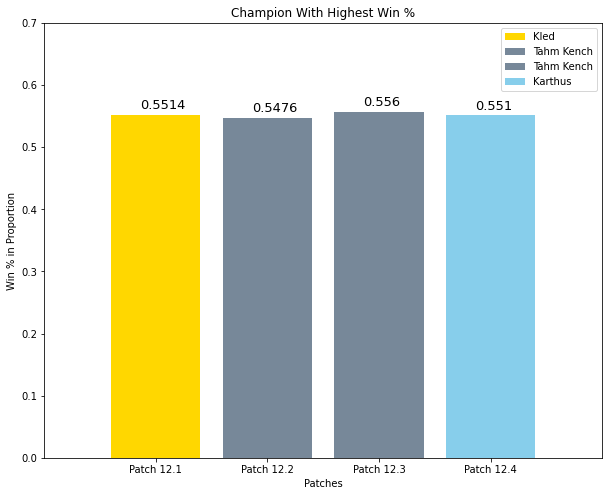

In [23]:
lol_1_champion_win_legend = lol_1_champion_win['Name'].iloc[0]
lol_1_champion_win_y = lol_1_champion_win['Win %'].iloc[0]
#print(lol_1_champion_win_legend)
#print(lol_1_champion_win_y)

lol_2_champion_win_legend = lol_2_champion_win['Name'].iloc[0]
lol_2_champion_win_y = lol_2_champion_win['Win %'].iloc[0]
#print(lol_2_champion_win_legend)
#print(lol_2_champion_win_y)

lol_3_champion_win_legend = lol_3_champion_win['Name'].iloc[0]
lol_3_champion_win_y = lol_3_champion_win['Win %'].iloc[0]
#print(lol_3_champion_win_legend)
#print(lol_3_champion_win_y)

lol_4_champion_win_legend = lol_4_champion_win['Name'].iloc[0]
lol_4_champion_win_y = lol_4_champion_win['Win %'].iloc[0]
#print(lol_4_champion_win_legend)
#print(lol_4_champion_win_y)

lol_champion_win_y = []
lol_champion_win_y.append(lol_1_champion_win_y)
lol_champion_win_y.append(lol_2_champion_win_y)
lol_champion_win_y.append(lol_3_champion_win_y)
lol_champion_win_y.append(lol_4_champion_win_y)

lol_champion_win_legend = []
lol_champion_win_legend.append(lol_1_champion_win_legend)
lol_champion_win_legend.append(lol_2_champion_win_legend)
lol_champion_win_legend.append(lol_3_champion_win_legend)
lol_champion_win_legend.append(lol_4_champion_win_legend)


plt.figure(figsize = (10, 8))
ax = plt.subplot()

colors = ['gold', 'lightslategray', 'lightslategray', 'skyblue']

i = 0
for bar, label, color in zip(lol_champion_win_y, lol_champion_win_legend, colors):
    plt.bar(i, bar, label = label, color = color)
    i += 1
    
for i, v in enumerate(lol_champion_win_y):
    ax.text(i - 0.14, v + 0.01, str(v), size = 13)

plt.axis([-1, 4, 0, 0.7])
ax.set_xticks(range(4))
ax.set_xticklabels(['Patch 12.1', 'Patch 12.2', 'Patch 12.3', 'Patch 12.4'])
ax.set_title("Champion With Highest Win %")
plt.xlabel("Patches")
plt.ylabel("Win % in Proportion")

plt.legend()

plt.savefig("champion_highest_win_all_patches.png")
plt.show()

As you can see from this graph, in patches 12.2 and 12.3, Tahm Kench was the champion with the highest win rate, but was fixed in patch 12.4.

**[Return to Tasks](#tasks)**

## 1.3 Pick % to Ban % in the Assassin Class? <a id = 'question_1.3'></a>

In [24]:
lol_1['Pick %'] = lol_1['Pick %'].str.rstrip('%').astype('float') / 100
lol_2['Pick %'] = lol_2['Pick %'].str.rstrip('%').astype('float') / 100
lol_3['Pick %'] = lol_3['Pick %'].str.rstrip('%').astype('float') / 100
lol_4['Pick %'] = lol_4['Pick %'].str.rstrip('%').astype('float') / 100

lol_1['Ban %'] = lol_1['Ban %'].str.rstrip('%').astype('float') / 100
lol_2['Ban %'] = lol_2['Ban %'].str.rstrip('%').astype('float') / 100
lol_3['Ban %'] = lol_3['Ban %'].str.rstrip('%').astype('float') / 100
lol_4['Ban %'] = lol_4['Ban %'].str.rstrip('%').astype('float') / 100

In [25]:
lol_1_pick_ban_assassin = lol_1[lol_1['Class'] == 'Assassin']
lol_1_pick_ban_assassin = lol_1_pick_ban_assassin.dropna()
lol_1_pick_ban_assassin = lol_1_pick_ban_assassin.drop_duplicates()

lol_1_pick_ban_assassin.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
2,Akali,Assassin,MID,S,65.30,6.51,0.4859,65.65%,0.0816,0.1288,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,0.4857,34.06%,0.0424,0.1288,2.04
33,Ekko,Assassin,JUNGLE,A,55.93,-1.56,0.4991,64.39%,0.0616,0.0409,2.74
34,Ekko,Assassin,MID,A,46.78,0.91,0.4967,33.37%,0.0326,0.0409,2.24
36,Evelynn,Assassin,JUNGLE,A,48.04,-1.54,0.4964,98.86%,0.0346,0.0885,2.94


In [26]:
lol_2_pick_ban_assassin = lol_2[lol_2['Class'] == 'Assassin']
lol_2_pick_ban_assassin = lol_2_pick_ban_assassin.dropna()
lol_2_pick_ban_assassin = lol_2_pick_ban_assassin.drop_duplicates()

lol_2_pick_ban_assassin.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
2,Akali,Assassin,TOP,S+,87.73,29.87,0.4970,44.38%,0.0619,0.2171,2.13
3,Akali,Assassin,MID,S,74.58,9.28,0.4985,55.40%,0.0826,0.2171,2.42
33,Ekko,Assassin,JUNGLE,A,57.22,1.29,0.5044,64.85%,0.0617,0.0399,2.74
34,Ekko,Assassin,MID,A,49.04,2.26,0.5064,33.14%,0.0303,0.0399,2.29
36,Evelynn,Assassin,JUNGLE,A,47.98,-0.06,0.5007,98.88%,0.0335,0.0833,2.92


In [27]:
lol_3_pick_ban_assassin = lol_3[lol_3['Class'] == 'Assassin']
lol_3_pick_ban_assassin = lol_3_pick_ban_assassin.dropna()
lol_3_pick_ban_assassin = lol_3_pick_ban_assassin.drop_duplicates()

lol_3_pick_ban_assassin.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
2,Akali,Assassin,TOP,S,74.79,-12.94,0.4848,41.25%,0.0510,0.2026,2.08
3,Akali,Assassin,MID,S,64.77,-9.81,0.4910,58.10%,0.0751,0.2026,2.33
35,Ekko,Assassin,JUNGLE,A,54.49,-2.72,0.5047,65.25%,0.0549,0.0351,2.69
36,Ekko,Assassin,MID,B,45.95,-3.09,0.4976,32.09%,0.0262,0.0351,2.23
38,Evelynn,Assassin,JUNGLE,B,43.12,-4.87,0.4782,98.21%,0.0352,0.0723,2.78


In [28]:
lol_4_pick_ban_assassin = lol_4[lol_4['Class'] == 'Assassin']
lol_4_pick_ban_assassin = lol_4_pick_ban_assassin.dropna()
lol_4_pick_ban_assassin = lol_4_pick_ban_assassin.drop_duplicates()

lol_4_pick_ban_assassin.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
2,Akali,Assassin,TOP,A,48.25,-26.55,0.4807,27.03%,0.0321,0.1830,2.03
3,Akali,Assassin,MID,S,73.23,8.46,0.4998,72.36%,0.0931,0.1830,2.32
33,Ekko,Assassin,JUNGLE,S,59.62,5.13,0.5195,64.38%,0.0570,0.0346,2.76
34,Ekko,Assassin,MID,A,47.82,1.87,0.5066,33.84%,0.0290,0.0346,2.30
36,Evelynn,Assassin,JUNGLE,B,42.86,-0.26,0.4827,98.73%,0.0335,0.0668,2.69


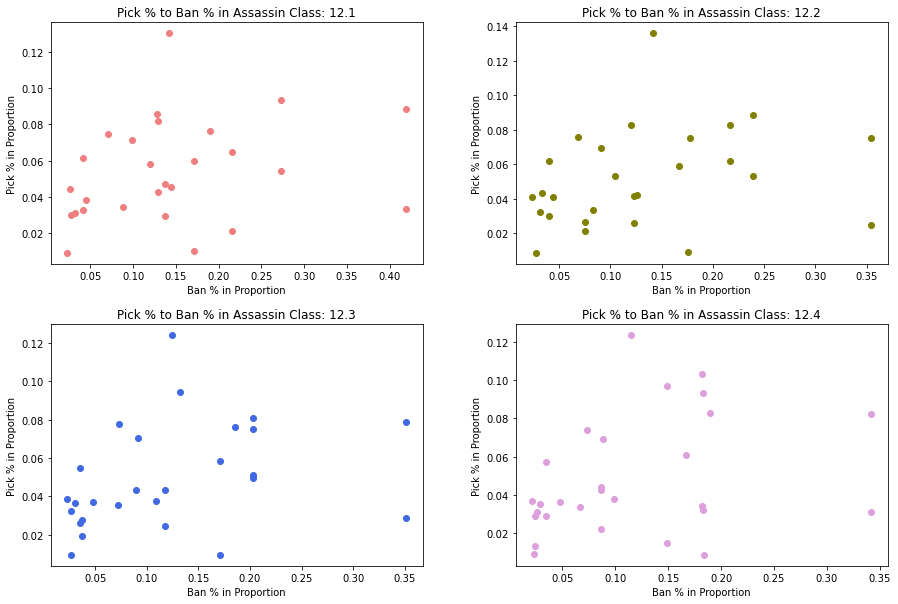

In [29]:
x1 = lol_1_pick_ban_assassin['Ban %']
y1 = lol_1_pick_ban_assassin['Pick %']

x2 = lol_2_pick_ban_assassin['Ban %']
y2 = lol_2_pick_ban_assassin['Pick %']

x3 = lol_3_pick_ban_assassin['Ban %']
y3 = lol_3_pick_ban_assassin['Pick %']

x4 = lol_4_pick_ban_assassin['Ban %']
y4 = lol_4_pick_ban_assassin['Pick %']


plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.scatter(x1, y1, color = 'lightcoral')
plt.title("Pick % to Ban % in Assassin Class: 12.1")
plt.xlabel("Ban % in Proportion")
plt.ylabel("Pick % in Proportion")

plt.subplot(2, 2, 2)
plt.scatter(x2, y2, color = 'olive')
plt.title("Pick % to Ban % in Assassin Class: 12.2")
plt.xlabel("Ban % in Proportion")
plt.ylabel("Pick % in Proportion")

plt.subplot(2, 2, 3)
plt.scatter(x3, y3, color = 'royalblue')
plt.title("Pick % to Ban % in Assassin Class: 12.3")
plt.xlabel("Ban % in Proportion")
plt.ylabel("Pick % in Proportion")

plt.subplot(2, 2, 4)
plt.scatter(x4, y4, color = 'plum')
plt.title("Pick % to Ban % in Assassin Class: 12.4")
plt.xlabel("Ban % in Proportion")
plt.ylabel("Pick % in Proportion")

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.savefig("pick_ban_assassin_separate_patches.png")
plt.show()

Each of the graphs with each patch looks pretty similar to each other. You will see that there is a higher Ban % than there is a Pick % for the Assassin class.

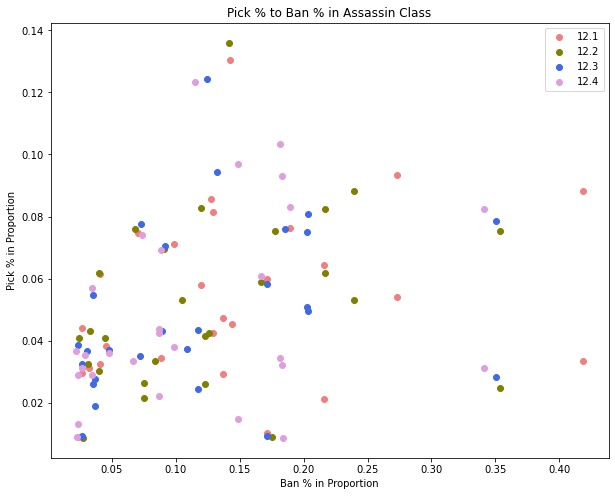

In [30]:
x = []
x.append(x1)
x.append(x2)
x.append(x3)
x.append(x4)

y = []
y.append(y1)
y.append(y2)
y.append(y3)
y.append(y4)

colors = ['lightcoral', 'olive', 'royalblue', 'plum']

plt.figure(figsize = (10, 8))

for ban, pick, color in zip(x, y, colors):
    plt.scatter(ban, pick, color = color)

plt.title("Pick % to Ban % in Assassin Class")
plt.xlabel("Ban % in Proportion")
plt.ylabel("Pick % in Proportion")
plt.legend(['12.1', '12.2', '12.3', '12.4'])    

plt.savefig("pick_ban_assassin_all_patches.png")
plt.show()

Combining all 4 of the previous graphs into one show that there are many more Assassin champions that are banned more than picked; and that there is a somewhat positive correlation between Pick % and Ban % in the Assassin class.

**[Return to Tasks](#tasks)**

## 1.4 Top 10 Champions Based on Score and Trends <a id = "question_1.4"></a>

In [31]:
sorted_lol_1_score = lol_1.sort_values('Score', ascending = False)
#sorted_lol_1_score.head(10)

lol_1_top_score = sorted_lol_1_score[sorted_lol_1_score['Score'] >= 85]
lol_1_top_score = lol_1_top_score.dropna()
lol_1_top_score = lol_1_top_score.drop_duplicates(subset = ['Name'])

lol_1_top_score.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
69,Jhin,Marksman,ADC,S+,94.23,3.23,0.5103,99.02%,0.2455,0.0581,3.01
96,Lulu,Controller,SUPPORT,S+,93.56,0.75,0.5084,97.72%,0.1430,0.2568,3.12
90,Lee Sin,Fighter,JUNGLE,S+,91.89,0.28,0.4845,96.61%,0.1529,0.1626,2.82
171,Tahm Kench,Tank,TOP,S+,91.80,21.07,0.5128,92.57%,0.0648,0.1624,2.60
224,Zed,Assassin,MID,S+,90.50,-0.27,0.5087,67.21%,0.0884,0.4188,2.31
152,Sett,Fighter,TOP,S+,90.23,15.56,0.4960,83.89%,0.0823,0.0737,1.76
21,Caitlyn,Marksman,ADC,S+,88.48,-0.16,0.5009,98.70%,0.2130,0.1896,2.31
155,Shen,Tank,TOP,S+,88.45,20.45,0.5274,87.85%,0.0634,0.0206,2.98
70,Jinx,Marksman,ADC,S+,86.76,-1.22,0.5132,99.51%,0.2227,0.0698,2.43
216,Yasuo,Fighter,MID,S+,86.16,-0.04,0.4956,71.44%,0.1177,0.2441,1.74


In [32]:
sorted_lol_2_score = lol_2.sort_values('Score', ascending = False)
#sorted_lol_2_score.head(10)

lol_2_top_score = sorted_lol_2_score[sorted_lol_2_score['Score'] >= 85]
lol_2_top_score = lol_2_top_score.dropna()
lol_2_top_score = lol_2_top_score.drop_duplicates(subset = ['Name'])

lol_2_top_score.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
95,Lulu,Controller,SUPPORT,S+,92.89,-0.68,0.5003,96.96%,0.1281,0.2269,3.04
68,Jhin,Marksman,ADC,S+,92.76,-1.47,0.5135,98.76%,0.2286,0.0569,3.02
151,Sett,Fighter,TOP,S+,92.52,2.29,0.5055,84.73%,0.0794,0.0695,1.79
88,Lee Sin,Fighter,JUNGLE,S+,91.81,-0.08,0.4825,95.08%,0.1518,0.1482,2.79
29,Diana,Fighter,JUNGLE,S+,91.29,8.33,0.5125,86.44%,0.1302,0.1918,2.46
216,Yasuo,Fighter,MID,S+,91.15,4.99,0.5051,72.52%,0.1165,0.2400,1.78
62,Janna,Controller,SUPPORT,S+,90.63,38.71,0.5321,95.09%,0.1280,0.0693,3.24
201,Viego,Assassin,JUNGLE,S+,87.83,5.35,0.5032,95.78%,0.1360,0.1418,2.51
222,Yuumi,Controller,SUPPORT,S+,87.74,8.01,0.4807,98.86%,0.1085,0.2762,4.10
2,Akali,Assassin,TOP,S+,87.73,29.87,0.4970,44.38%,0.0619,0.2171,2.13


In [33]:
sorted_lol_3_score = lol_3.sort_values('Score', ascending = False)
#sorted_lol_3_score.head(10)

lol_3_top_score = sorted_lol_3_score[sorted_lol_3_score['Score'] >= 85]
lol_3_top_score = lol_3_top_score.dropna()
lol_3_top_score = lol_3_top_score.drop_duplicates(subset = ['Name'])

lol_3_top_score.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,S+,95.22,39.37,0.5340,94.04%,0.1529,0.0893,2.59
227,Yuumi,Controller,SUPPORT,S+,95.16,7.42,0.4926,98.43%,0.1197,0.2678,4.14
231,Zeri,Marksman,ADC,S+,93.51,7.40,0.5232,81.37%,0.1821,0.5098,2.45
99,Lulu,Controller,SUPPORT,S+,93.35,0.46,0.5133,95.63%,0.1259,0.2053,3.08
92,Lee Sin,Fighter,JUNGLE,S+,89.35,-2.46,0.4759,93.27%,0.1562,0.1411,2.67
61,Irelia,Fighter,TOP,S+,89.17,13.34,0.4970,59.51%,0.0629,0.2067,1.60
156,Sett,Fighter,TOP,S+,88.44,-4.09,0.4898,80.25%,0.0737,0.0696,1.69
30,Darius,Fighter,TOP,S+,88.09,4.92,0.5010,94.03%,0.0639,0.1475,1.83
191,Tryndamere,Fighter,TOP,S+,87.69,4.11,0.5077,82.17%,0.0593,0.1808,1.84
41,Fiora,Fighter,TOP,S+,87.66,9.35,0.4982,97.43%,0.0670,0.1189,1.71


In [34]:
sorted_lol_4_score = lol_4.sort_values('Score', ascending = False)
#sorted_lol_4_score.head(10)

lol_4_top_score = sorted_lol_4_score[sorted_lol_4_score['Score'] >= 75]
lol_4_top_score = lol_4_top_score.dropna()
lol_4_top_score = lol_4_top_score.drop_duplicates(subset = ['Name'])

lol_4_top_score.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
130,Renata Glasc,Mage,SUPPORT,S+,92.95,0.00,0.5086,93.36%,0.2342,0.2983,2.58
1,Ahri,Mage,MID,S+,92.72,-2.50,0.5162,95.11%,0.1398,0.1261,2.54
217,Zeri,Marksman,ADC,S+,91.77,-1.73,0.5030,87.15%,0.1600,0.4816,2.33
56,Irelia,Fighter,TOP,S+,91.70,2.52,0.5020,72.18%,0.0787,0.2023,1.64
85,Lee Sin,Fighter,JUNGLE,S+,89.87,0.53,0.4730,94.29%,0.1548,0.1322,2.64
147,Sett,Fighter,TOP,S+,88.73,0.30,0.5089,84.87%,0.0832,0.0723,1.76
179,Tryndamere,Fighter,TOP,S+,86.84,-0.86,0.5156,87.82%,0.0667,0.2060,1.82
207,Yasuo,Fighter,MID,S+,86.49,6.14,0.4861,77.68%,0.1309,0.2343,1.71
29,Diana,Fighter,JUNGLE,S+,81.90,-3.00,0.5178,86.03%,0.1088,0.1545,2.48
65,Jhin,Marksman,ADC,S+,80.60,6.19,0.5125,98.78%,0.2190,0.0563,2.94


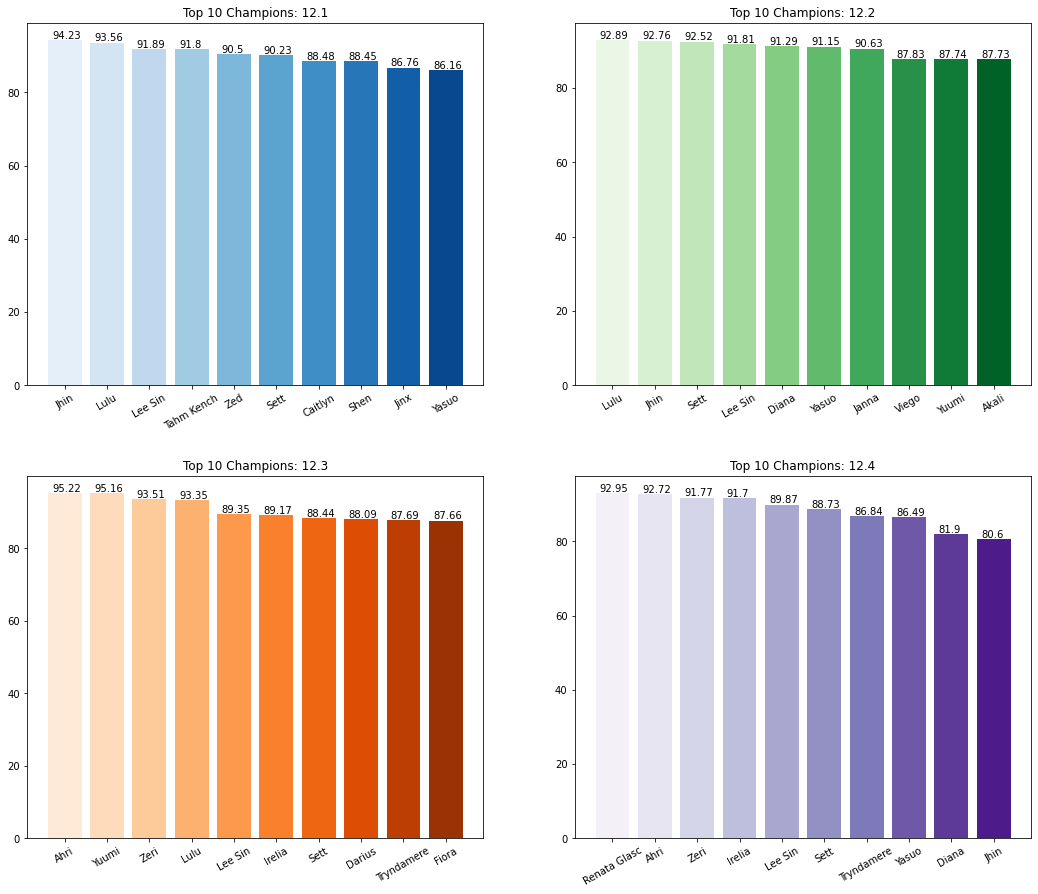

In [35]:
lol_1_top_score_legend = lol_1_top_score['Name'].iloc[0:10]
lol_1_top_score_y = lol_1_top_score['Score'].iloc[0:10]
#print(lol_1_top_score_legend)
#print(lol_1_top_score_y)

lol_2_top_score_legend = lol_2_top_score['Name'].iloc[0:10]
lol_2_top_score_y = lol_2_top_score['Score'].iloc[0:10]
#print(lol_2_top_score_legend)
#print(lol_2_top_score_y)

lol_3_top_score_legend = lol_3_top_score['Name'].iloc[0:10]
lol_3_top_score_y = lol_3_top_score['Score'].iloc[0:10]
#print(lol_3_top_score_legend)
#print(lol_3_top_score_y)

lol_4_top_score_legend = lol_4_top_score['Name'].iloc[0:10]
lol_4_top_score_y = lol_4_top_score['Score'].iloc[0:10]
#print(lol_4_top_score_legend)
#print(lol_4_top_score_y)


plt.figure(figsize = (18, 15))
pal1 = sns.color_palette("Blues", 10)
sns.set_palette(pal1)
ax1 = plt.subplot(2, 2, 1)
i = 0
for y in lol_1_top_score_y:
    plt.bar(i, y)
    i += 1
plt.title("Top 10 Champions: 12.1")
ax1.set_xticks(range(10))
ax1.set_xticklabels([label for label in lol_1_top_score_legend], rotation = 30)

for i, v in enumerate(lol_1_top_score_y):
    ax1.text(i - 0.3, v + 0.4, str(v))


pal2 = sns.color_palette("Greens", 10)
sns.set_palette(pal2)
ax2 = plt.subplot(2, 2, 2)
i = 0
for y in lol_2_top_score_y:
    plt.bar(i, y)
    i += 1   
plt.title("Top 10 Champions: 12.2")
ax2.set_xticks(range(10))
ax2.set_xticklabels([label for label in lol_2_top_score_legend], rotation = 30)

for i, v in enumerate(lol_2_top_score_y):
    ax2.text(i - 0.3, v + 0.4, str(v))


pal3 = sns.color_palette("Oranges", 10)
sns.set_palette(pal3)
ax3 = plt.subplot(2, 2, 3)
i = 0
for y in lol_3_top_score_y:
    plt.bar(i, y)
    i += 1   
plt.title("Top 10 Champions: 12.3")
ax3.set_xticks(range(10))
ax3.set_xticklabels([label for label in lol_3_top_score_legend], rotation = 30)

for i, v in enumerate(lol_3_top_score_y):
    ax3.text(i - 0.3, v + 0.4, str(v))


pal3 = sns.color_palette("Purples", 10)
sns.set_palette(pal3)    
ax4 = plt.subplot(2, 2, 4)
i = 0
for y in lol_4_top_score_y:
    plt.bar(i, y)
    i += 1   
plt.title("Top 10 Champions: 12.4")
ax4.set_xticks(range(10))
ax4.set_xticklabels([label for label in lol_4_top_score_legend], rotation = 30)

for i, v in enumerate(lol_4_top_score_y):
    ax4.text(i - 0.3, v + 0.4, str(v))
    
    
plt.subplots_adjust(hspace = 0.25)

plt.savefig("top_10_champions_separate_patches.png")
plt.show()

These are the top 10 champions for each patch based on their scores. Scores are determined by champion's Win %, KDA, Ban %, etc. and put into a specific algorithm done through [MetaSrc](https://www.metasrc.com/5v5/tierlist).

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


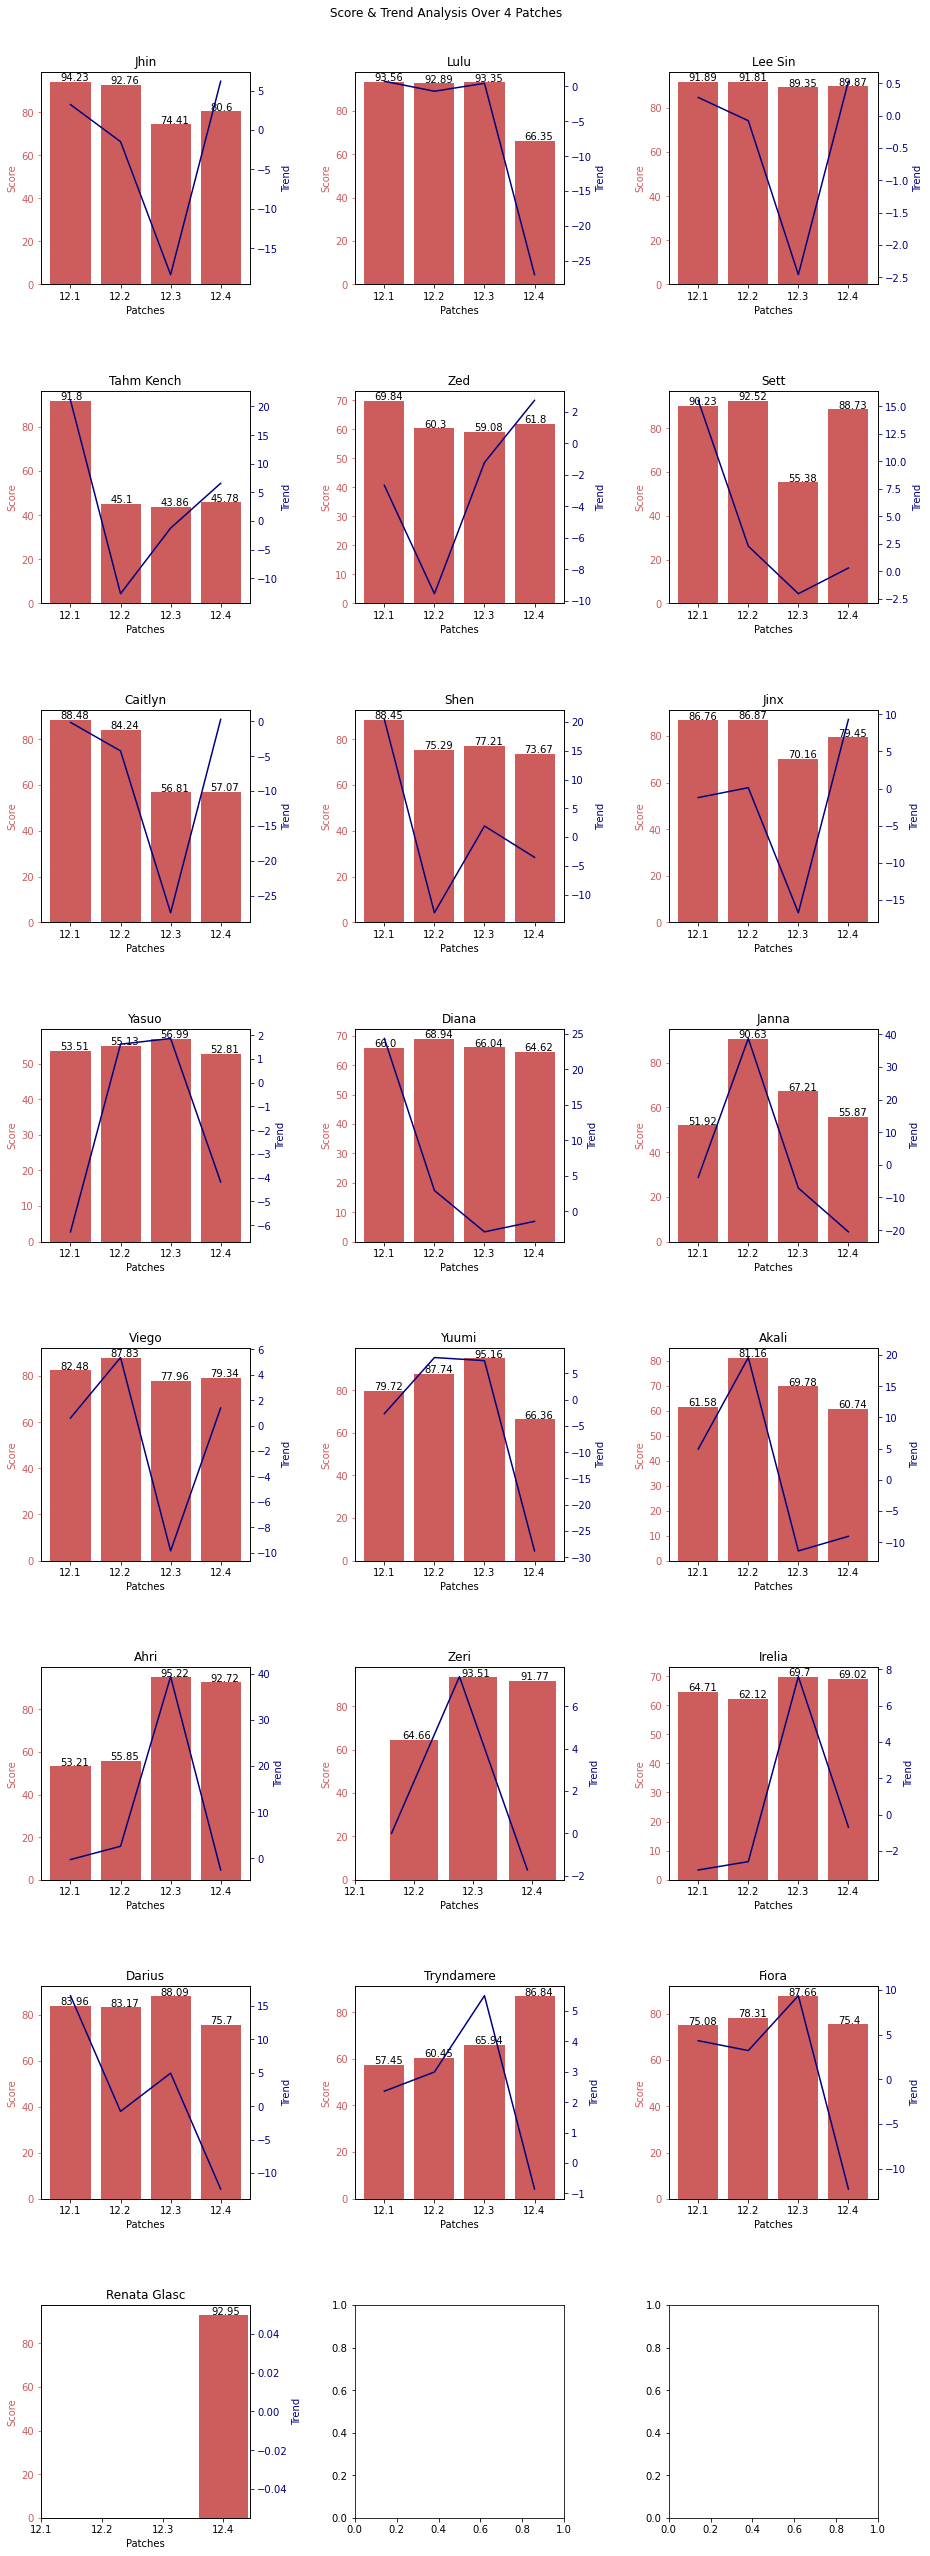

In [36]:
lol_1_top_score_name = lol_1_top_score_legend   
#print(lol_1_top_score_name)

lol_2_top_score_name = lol_2_top_score_legend
#print(lol_2_top_score_name)

lol_3_top_score_name = lol_3_top_score_legend
#print(lol_3_top_score_name)

lol_4_top_score_name = lol_4_top_score_legend
#print(lol_4_top_score_name)


lol_top_score_name_old = []
lol_top_score_name_old.append(lol_1_top_score_name)
lol_top_score_name_old.append(lol_2_top_score_name)
lol_top_score_name_old.append(lol_3_top_score_name)
lol_top_score_name_old.append(lol_4_top_score_name)

lol_top_score_name = []
for name in lol_top_score_name_old:
    for champion in name:
        if champion not in lol_top_score_name:
            lol_top_score_name.append(champion)
#print(lol_top_score_name)        
#print(len(lol_top_score_name))

lol_top_score_score = []
lol_top_score_trend = []


for name in lol_top_score_name:
    #print(name)
    
    lol_champion_score = []
    lol_champion_trend = []
    champion_name_1 = lol_1[lol_1['Name'] == name]
    #print(champion_name_1)
    champion_score_1 = champion_name_1['Score'].mean()
    #print(champion_score_1)
    champion_trend_1 = champion_name_1['Trend'].mean()
    #print(champion_trend_1)
    lol_champion_score.append(round(champion_score_1, 2))
    lol_champion_trend.append(round(champion_trend_1, 2))
    
    champion_name_2 = lol_2[lol_2['Name'] == name]
    #print(champion_name_2)
    champion_score_2 = champion_name_2['Score'].mean()
    #print(champion_score_2)
    champion_trend_2 = champion_name_2['Trend'].mean()
    #print(champion_trend_2)
    lol_champion_score.append(round(champion_score_2, 2))
    lol_champion_trend.append(round(champion_trend_2, 2))
    
    champion_name_3 = lol_3[lol_3['Name'] == name]
    #print(champion_name_3)
    champion_score_3 = champion_name_3['Score'].mean()
    #print(champion_score_3)
    champion_trend_3 = champion_name_3['Trend'].mean()
    #print(champion_trend_3)
    lol_champion_score.append(round(champion_score_3, 2))
    lol_champion_trend.append(round(champion_trend_3, 2))
    
    champion_name_4 = lol_4[lol_4['Name'] == name]
    #print(champion_name_4)
    champion_score_4 = champion_name_4['Score'].mean()
    #print(champion_score_4)
    champion_trend_4 = champion_name_4['Trend'].mean()
    #print(champion_trend_4)
    lol_champion_score.append(round(champion_score_4, 2))
    lol_champion_trend.append(round(champion_trend_4, 2))
    
    lol_top_score_score.append(lol_champion_score)
    lol_top_score_trend.append(lol_champion_trend)

#print(len(lol_top_score_name))
#print(len(lol_top_score_score))
#print(len(lol_top_score_trend))





    
fig, axs = plt.subplots(nrows = 8, ncols = 3, figsize = (15, 45))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
fig.suptitle("Score & Trend Analysis Over 4 Patches", y = 0.9)

num = 0
x = range(4)
colors = ['indianred', 'navy']
for score, trend, ax in zip(lol_top_score_score, lol_top_score_trend, axs.ravel()):
    ax.set_title(lol_top_score_name[num])
    ax.set_xlabel("Patches")
    ax.set_ylabel("Score", color = colors[0])
    ax.bar(x, score, color = colors[0])
    ax.tick_params(axis = 'y', colors = colors[0])
    for i, v in enumerate(score):
        ax.text(i - 0.2, v + 0.4, str(v))
    
    ax2 = ax.twinx() #shares the x-axis but creates a new y-axis
    ax2.set_ylabel("Trend", color = colors[1])
    ax2.plot(x, trend, color = colors[1])
    ax2.tick_params(axis = 'y', colors = colors[1])
    
    ax.set_xticks(x)
    ax.set_xticklabels(['12.1', '12.2', '12.3', '12.4'])
    num += 1

plt.savefig("trends_scores_for_top_10_champions.png")
plt.show()

As there is a lot of data presented here, we are looking at the top 10 champions through all four patches, and what their scores and trends were through all the patches.

<br>

The trends you see on the graphs indicate (and predict) the overall direction of the champion's score. As you can see, a majority of the trends are pretty accurate through all the patches. We can predict that whatever trends have a downward trend for patch 12.4, they will most likely go up; while the upward trends will most likely go down as the champions (especially strong ones) are worked on and tweaked every patch.

**[Return to Tasks](#tasks)**

## 1.5 Top 10 Champions Based on Score, What is Win % and Ban %? <a id = 'question_1.5'></a>

In [65]:
lol_1['Win %'] = lol_1['Win %'].str.rstrip('%').astype('float') / 100
lol_2['Win %'] = lol_2['Win %'].str.rstrip('%').astype('float') / 100
lol_3['Win %'] = lol_3['Win %'].str.rstrip('%').astype('float') / 100
lol_4['Win %'] = lol_4['Win %'].str.rstrip('%').astype('float') / 100

lol_1['Ban %'] = lol_1['Ban %'].str.rstrip('%').astype('float') / 100
lol_2['Ban %'] = lol_2['Ban %'].str.rstrip('%').astype('float') / 100
lol_3['Ban %'] = lol_3['Ban %'].str.rstrip('%').astype('float') / 100
lol_4['Ban %'] = lol_4['Ban %'].str.rstrip('%').astype('float') / 100

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

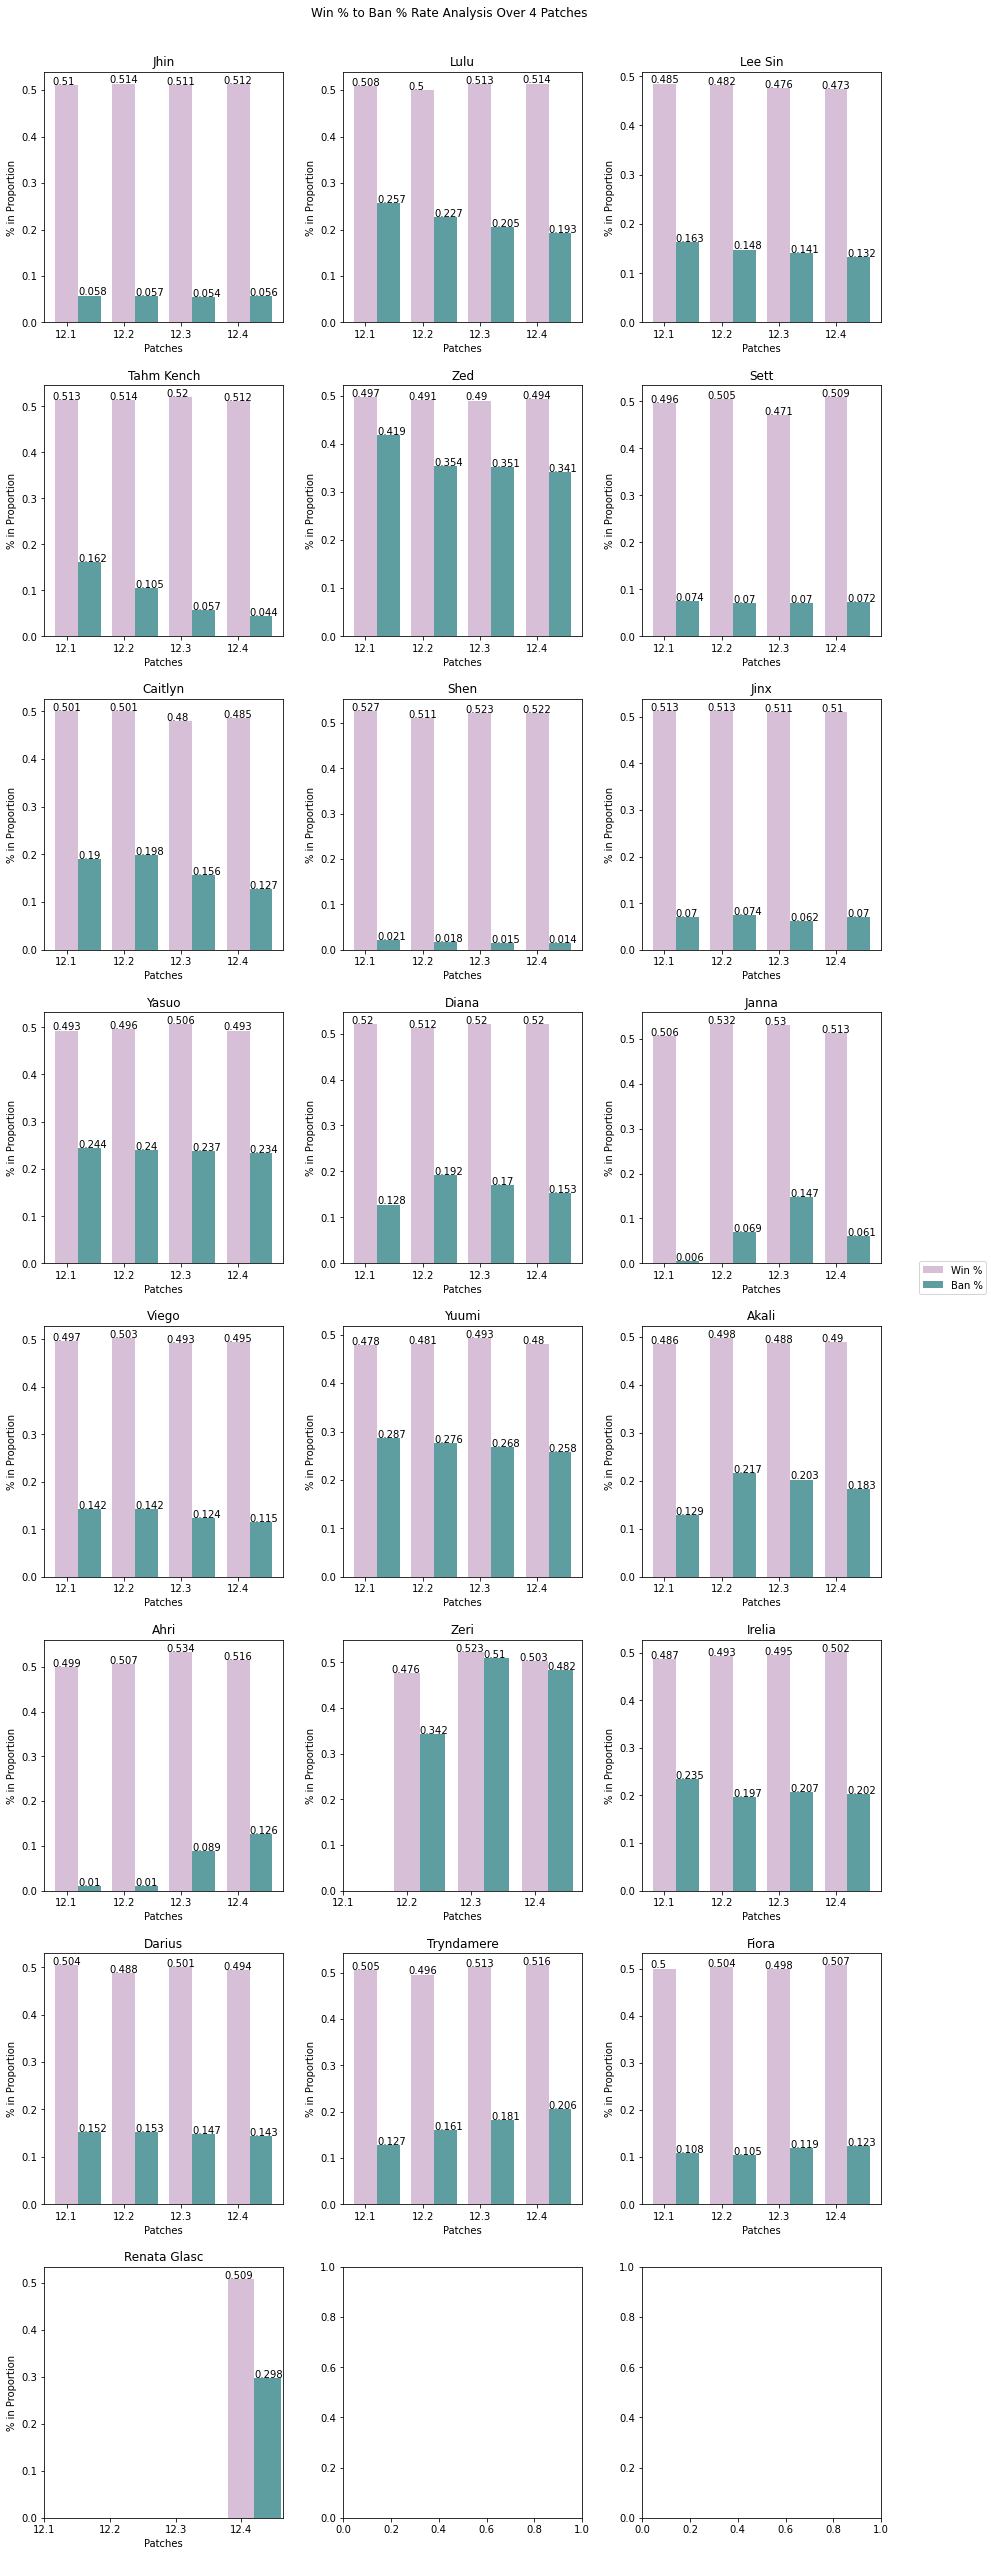

In [66]:
lol_top_score_win = []
lol_top_score_ban = []


for name in lol_top_score_name:
    #print(name)
    
    lol_champion_win = []
    lol_champion_ban = []
    champion_name_1 = lol_1[lol_1['Name'] == name]
    #print(champion_name_1)
    champion_win_1 = champion_name_1['Win %'].mean()
    #print(champion_win_1)
    champion_ban_1 = champion_name_1['Ban %'].mean()
    #print(champion_ban_1)
    lol_champion_win.append(round(champion_win_1, 3))
    lol_champion_ban.append(round(champion_ban_1, 3))
    
    champion_name_2 = lol_2[lol_2['Name'] == name]
    #print(champion_name_2)
    champion_win_2 = champion_name_2['Win %'].mean()
    #print(champion_win_2)
    champion_ban_2 = champion_name_2['Ban %'].mean()
    #print(champion_ban_2)
    lol_champion_win.append(round(champion_win_2, 3))
    lol_champion_ban.append(round(champion_ban_2, 3))
    
    champion_name_3 = lol_3[lol_3['Name'] == name]
    #print(champion_name_3)
    champion_win_3 = champion_name_3['Win %'].mean()
    #print(champion_win_3)
    champion_ban_3 = champion_name_3['Ban %'].mean()
    #print(champion_ban_3)
    lol_champion_win.append(round(champion_win_3, 3))
    lol_champion_ban.append(round(champion_ban_3, 3))
    
    champion_name_4 = lol_4[lol_4['Name'] == name]
    #print(champion_name_4)
    champion_win_4 = champion_name_4['Win %'].mean()
    #print(champion_win_3)
    champion_ban_4 = champion_name_4['Ban %'].mean()
    #print(champion_ban_3)
    lol_champion_win.append(round(champion_win_4, 3))
    lol_champion_ban.append(round(champion_ban_4, 3))
    
    lol_top_score_win.append(lol_champion_win)
    lol_top_score_ban.append(lol_champion_ban)

#print(lol_top_score_name)
#print(lol_top_score_win)
#print(lol_top_score_ban)

#print(len(lol_top_score_name))
#print(len(lol_top_score_win))
#print(len(lol_top_score_ban))



fig, axs = plt.subplots(nrows = 8, ncols = 3, figsize = (15, 45))
plt.subplots_adjust(hspace = 0.25, wspace = 0.25)
fig.suptitle("Win % to Ban % Rate Analysis Over 4 Patches", y = 0.9)


#bar 1
n = 1
t = 2
d = 4
w = 0.8
x_values1 = [t * element + w * n for element in range(d)]

#bar 2
n = 2
t = 2
d = 4
w = 0.8
x_values2 = [t * element + w * n for element in range(d)]


num = 0
colors = ['thistle', 'cadetblue']
for win, ban, ax in zip(lol_top_score_win, lol_top_score_ban, axs.ravel()):
    ax.set_title(lol_top_score_name[num])
    ax.set_xlabel("Patches")
    ax.set_ylabel("% in Proportion")
    ax.bar(x_values1, win, color = colors[0], label = 'Win %')
    ax.bar(x_values2, ban, color = colors[1], label = 'Ban %')
    for i, v in enumerate(win):
        ax.text(x_values1[i] - 0.5, v + 0.001, str(v))
        
    for i, v in enumerate(ban):
        ax.text(x_values2[i] - 0.4, v + 0.001, str(v))
    
    ax.set_xticks(x_values1)
    ax.set_xticklabels(['12.1', '12.2', '12.3', '12.4'])
    
    num += 1

fig.legend(['Win %', 'Ban %'], loc = 7)
plt.savefig("win_ban_rate_for_top_10_champions.png")
plt.show()


All these graphs that we are looking at have to do with the top 10 champions throughout all 4 patches as well. However, we are looking at the Win % to Ban % for each champion. Any champions that are missing a couple of patches mean they were added after patch 12.1.

<br>

A high Win % and high Ban % would indicate that the champion is too strong, therefore the champion keeps getting banned such as Zeri, Zed, and even Renata Glasc, and Yuumi. A high Win % with a low Ban % would indicate that the champion is strong, but relies more on the player's skill and ability; Jhin, Sett, Shen, and Jinx are examples of these types of champions.

**[Return to Tasks](#tasks)**

## 1.6 Proportion of Champions in Mid Lane as Marksman or Mage? <a id = 'question_1.6'></a>

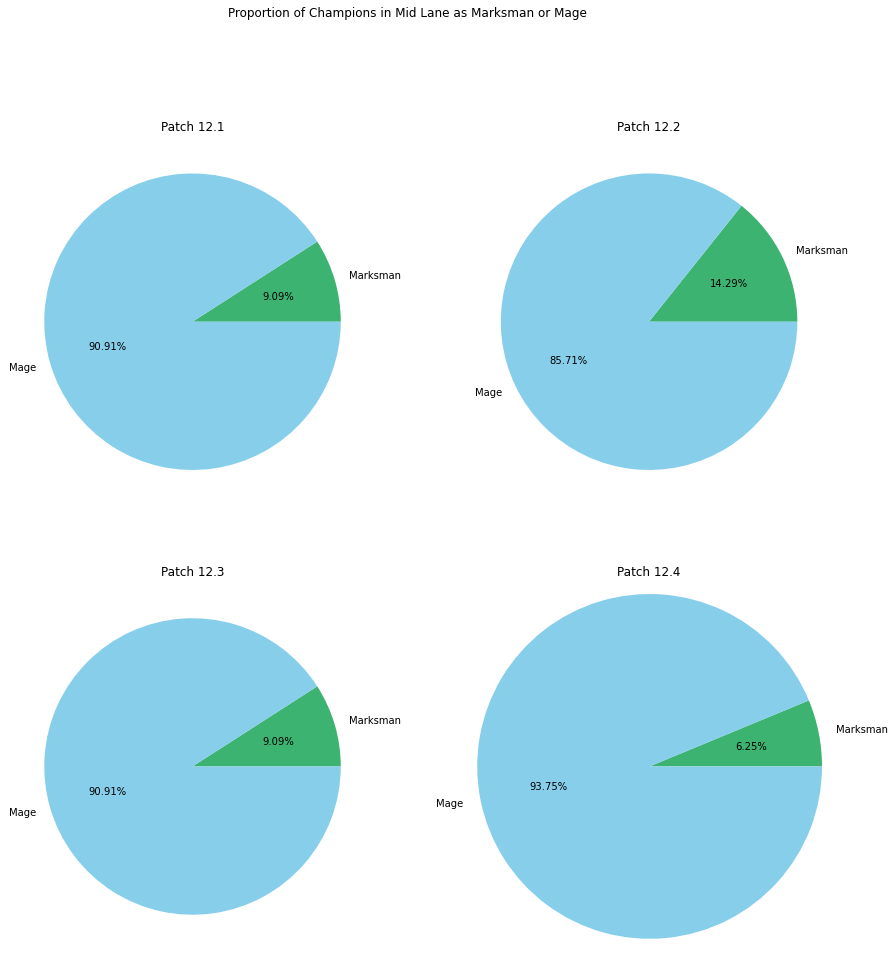

In [59]:
lol_1_mid = lol_1[lol_1['Role'] == 'MID']
lol_1_mid_marksman = lol_1_mid['Class'][lol_1_mid['Class'] == 'Marksman']
lol_1_mid_mage = lol_1_mid['Class'][lol_1_mid['Class'] == 'Mage']
lol_1_mid_marksman = len(lol_1_mid_marksman)
lol_1_mid_mage = len(lol_1_mid_mage)
#print(lol_1_mid_marksman)
#print(lol_1_mid_mage)

lol_2_mid = lol_2[lol_2['Role'] == 'MID']
lol_2_mid_marksman = lol_2_mid['Class'][lol_2_mid['Class'] == 'Marksman']
lol_2_mid_mage = lol_2_mid['Class'][lol_2_mid['Class'] == 'Mage']
lol_2_mid_marksman = len(lol_2_mid_marksman)
lol_2_mid_mage = len(lol_2_mid_mage)
#print(lol_2_mid_marksman)
#print(lol_2_mid_mage)

lol_3_mid = lol_3[lol_3['Role'] == 'MID']
lol_3_mid_marksman = lol_3_mid['Class'][lol_3_mid['Class'] == 'Marksman']
lol_3_mid_mage = lol_3_mid['Class'][lol_3_mid['Class'] == 'Mage']
lol_3_mid_marksman = len(lol_3_mid_marksman)
lol_3_mid_mage = len(lol_3_mid_mage)
#print(lol_3_mid_marksman)
#print(lol_3_mid_mage)

lol_4_mid = lol_4[lol_4['Role'] == 'MID']
lol_4_mid_marksman = lol_4_mid['Class'][lol_4_mid['Class'] == 'Marksman']
lol_4_mid_mage = lol_4_mid['Class'][lol_4_mid['Class'] == 'Mage']
lol_4_mid_marksman = len(lol_4_mid_marksman)
lol_4_mid_mage = len(lol_4_mid_mage)
#print(lol_4_mid_marksman)
#print(lol_4_mid_mage)


lol_1_mid_marksman_mage = []
lol_1_mid_marksman_mage.append(lol_1_mid_marksman)
lol_1_mid_marksman_mage.append(lol_1_mid_mage)

lol_2_mid_marksman_mage = []
lol_2_mid_marksman_mage.append(lol_2_mid_marksman)
lol_2_mid_marksman_mage.append(lol_2_mid_mage)

lol_3_mid_marksman_mage = []
lol_3_mid_marksman_mage.append(lol_3_mid_marksman)
lol_3_mid_marksman_mage.append(lol_3_mid_mage)

lol_4_mid_marksman_mage = []
lol_4_mid_marksman_mage.append(lol_4_mid_marksman)
lol_4_mid_marksman_mage.append(lol_4_mid_mage)

lol_mid_marksman_mage = []
lol_mid_marksman_mage.append(lol_1_mid_marksman_mage)
lol_mid_marksman_mage.append(lol_2_mid_marksman_mage)
lol_mid_marksman_mage.append(lol_3_mid_marksman_mage)
lol_mid_marksman_mage.append(lol_4_mid_marksman_mage)

#print(lol_mid_marksman_mage)


fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
fig.suptitle("Proportion of Champions in Mid Lane as Marksman or Mage", y = 1)

labels = ['Marksman', 'Mage']
num = 1
colors = ['mediumseagreen', 'skyblue']
for pie, ax in zip(lol_mid_marksman_mage, axs.ravel()):
    ax.set_title("Patch 12." + str(num))
    ax.pie(pie, labels = labels, colors = colors, autopct = '%0.2f%%')
    plt.axis('equal')
    
    num += 1

plt.savefig("mid_marksman_mage_percent.png")
plt.show()

Based on all 4 patches, and the graphs based on those patches, it would show that there are many more Mages in the Mid lane, then there are Marksman.

**[Return to Tasks](#tasks)**

## 1.7 Proportion of Champions in Top Lane as Fighter or Controller with 50% or More Win %? <a id = 'question_1.7'></a>

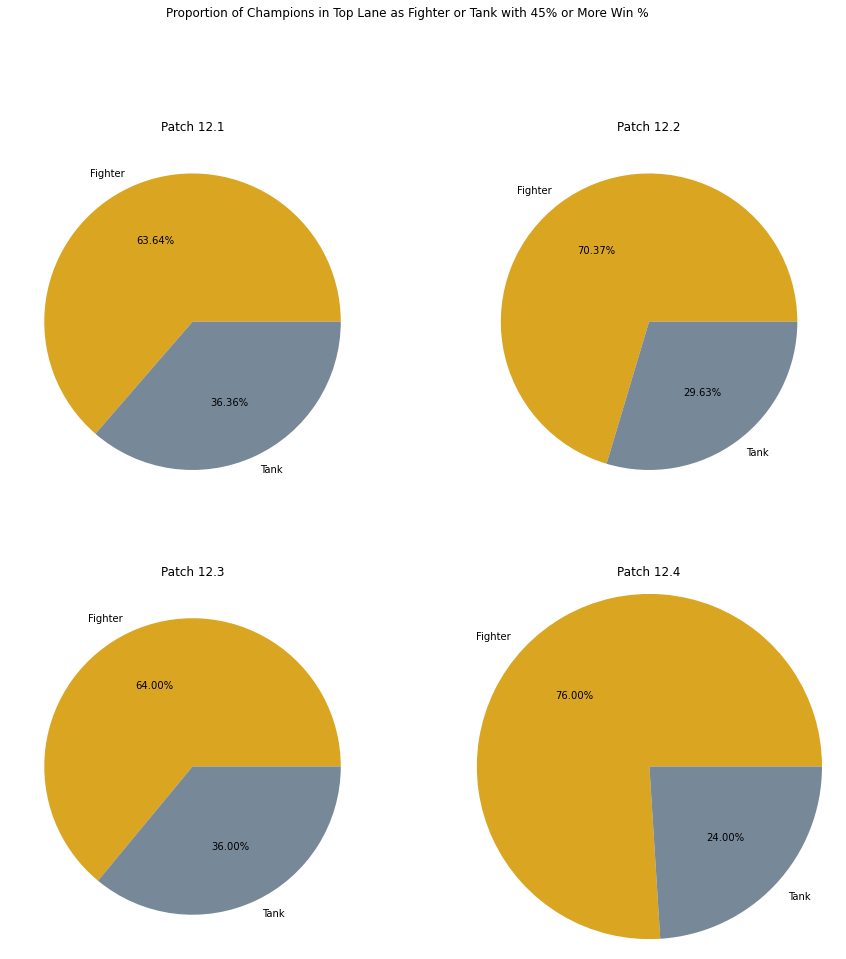

In [58]:
lol_1_top = lol_1[lol_1['Role'] == 'TOP']
lol_1_top_fighter = lol_1_top[lol_1_top['Class'] == 'Fighter']
lol_1_top_fighter_45 = lol_1_top_fighter[lol_1_top_fighter['Win %'] >= 0.5]
lol_1_top_fighter_45 = len(lol_1_top_fighter_45)
lol_1_top_tank = lol_1_top[lol_1_top['Class'] == 'Tank']
lol_1_top_tank_45 = lol_1_top_tank[lol_1_top_tank['Win %'] >= 0.5]
lol_1_top_tank_45 = len(lol_1_top_tank_45)
#print(lol_1_top_fighter_45)
#print(lol_1_top_tank_45)

lol_2_top = lol_2[lol_2['Role'] == 'TOP']
lol_2_top_fighter = lol_2_top[lol_2_top['Class'] == 'Fighter']
lol_2_top_fighter_45 = lol_2_top_fighter[lol_2_top_fighter['Win %'] >= 0.5]
lol_2_top_fighter_45 = len(lol_2_top_fighter_45)
lol_2_top_tank = lol_2_top[lol_2_top['Class'] == 'Tank']
lol_2_top_tank_45 = lol_2_top_tank[lol_2_top_tank['Win %'] >= 0.5]
lol_2_top_tank_45 = len(lol_2_top_tank_45)
#print(lol_2_top_fighter_45)
#print(lol_2_top_tank_45)

lol_3_top = lol_3[lol_3['Role'] == 'TOP']
lol_3_top_fighter = lol_3_top[lol_3_top['Class'] == 'Fighter']
lol_3_top_fighter_45 = lol_3_top_fighter[lol_3_top_fighter['Win %'] >= 0.5]
lol_3_top_fighter_45 = len(lol_3_top_fighter_45)
lol_3_top_tank = lol_3_top[lol_3_top['Class'] == 'Tank']
lol_3_top_tank_45 = lol_3_top_tank[lol_3_top_tank['Win %'] >= 0.5]
lol_3_top_tank_45 = len(lol_3_top_tank_45)
#print(lol_3_top_fighter_45)
#print(lol_3_top_tank_45)

lol_4_top = lol_4[lol_4['Role'] == 'TOP']
lol_4_top_fighter = lol_4_top[lol_4_top['Class'] == 'Fighter']
lol_4_top_fighter_45 = lol_4_top_fighter[lol_4_top_fighter['Win %'] >= 0.5]
lol_4_top_fighter_45 = len(lol_4_top_fighter_45)
lol_4_top_tank = lol_4_top[lol_4_top['Class'] == 'Tank']
lol_4_top_tank_45 = lol_4_top_tank[lol_4_top_tank['Win %'] >= 0.5]
lol_4_top_tank_45 = len(lol_4_top_tank_45)
#print(lol_4_top_fighter_45)
#print(lol_4_top_tank_45)


lol_1_top_fighter_tank = []
lol_1_top_fighter_tank.append(lol_1_top_fighter_45)
lol_1_top_fighter_tank.append(lol_1_top_tank_45)

lol_2_top_fighter_tank = []
lol_2_top_fighter_tank.append(lol_2_top_fighter_45)
lol_2_top_fighter_tank.append(lol_2_top_tank_45)

lol_3_top_fighter_tank = []
lol_3_top_fighter_tank.append(lol_3_top_fighter_45)
lol_3_top_fighter_tank.append(lol_3_top_tank_45)

lol_4_top_fighter_tank = []
lol_4_top_fighter_tank.append(lol_4_top_fighter_45)
lol_4_top_fighter_tank.append(lol_4_top_tank_45)

lol_top_fighter_tank = []
lol_top_fighter_tank.append(lol_1_top_fighter_tank)
lol_top_fighter_tank.append(lol_2_top_fighter_tank)
lol_top_fighter_tank.append(lol_3_top_fighter_tank)
lol_top_fighter_tank.append(lol_4_top_fighter_tank)
#print(lol_top_fighter_tank)


fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
fig.suptitle("Proportion of Champions in Top Lane as Fighter or Tank with 45% or More Win %", y = 1)

labels = ['Fighter', 'Tank']
num = 1
colors = ['goldenrod', 'lightslategray']
for pie, ax in zip(lol_top_fighter_tank, axs.ravel()):
    ax.set_title("Patch 12." + str(num))
    ax.pie(pie, labels = labels, colors = colors, autopct = '%0.2f%%')
    plt.axis('equal')
    
    num += 1

plt.savefig("top_fighter_tank_45_win_percent.png")
plt.show()

Looking at all 4 graphs throughout the different patches shows that being a Fighter in the Top lane has a higher Win % than a Tank would. This would suggest that a player would be better off picking a Fighter as a Top laner to try to have a higher advantage at winning the game.

**[Return to Tasks](#tasks)**

<hr>

# 2. Champions in Most Recent Patch (12.4):

## 2.1 Higher Win % in Mid or Support Lane for Lux? <a id = 'question_2.1'></a>

In [41]:
lol_4['Win %'] = lol_4['Win %'].str.rstrip('%').astype('float') / 100

In [42]:
lol_4_lux = lol_4[lol_4['Name'] == 'Lux']
lol_4_lux.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
92,Lux,Mage,SUPPORT,S,66.35,-27.0,0.5135,94.83%,10.76%,19.33%,3.05
93,Lux,Mage,MID,S,63.43,-2.2,0.4943,34.37%,6.63%,12.88%,2.78


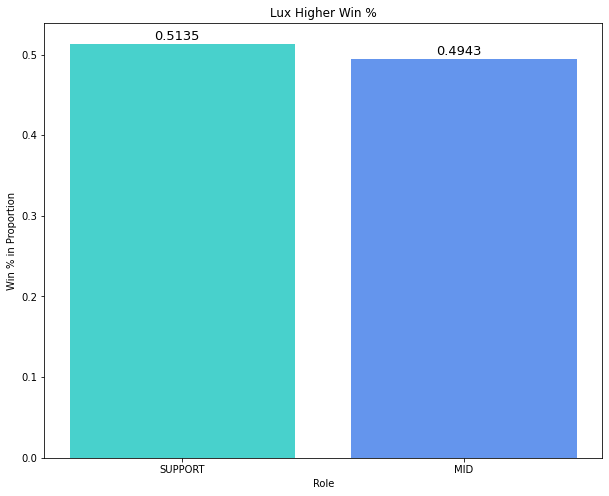

In [43]:
lol_4_lux_win = lol_4_lux['Win %'].values
lol_4_lux_win = [ round(x, 4) for x in lol_4_lux_win ]
#print(lol_4_lux_win)


colors = ['mediumturquoise', 'cornflowerblue']
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(2), lol_4_lux_win, color = colors)

plt.title("Lux Higher Win %")
plt.ylabel("Win % in Proportion")
plt.xlabel("Role")

ax.set_xticks(range(2))
ax.set_xticklabels(['SUPPORT', 'MID'])
for i, v in enumerate(lol_4_lux_win):
    ax.text(i - 0.1, v + 0.005, str(v), size = 13)

plt.savefig("lux_higher_win_percent.png")
plt.show()

Based on Lux's Win %, a player would be better off picking Lux as a Mage in the Support lane in the 12.4 patch as Lux has a 51.35% chance of winning, while the Lux in the Mid lane only has 49.43%.

In [44]:
lol_4_mage = lol_4[lol_4['Class'] == 'Mage']
lol_4_mage.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,S+,92.72,-2.50,0.5162,95.11%,13.98%,12.61%,2.54
9,Anivia,Mage,MID,A,53.94,1.19,0.5272,82.86%,3.00%,2.97%,2.57
10,Anivia,Mage,SUPPORT,C,35.06,3.87,0.4684,12.50%,0.42%,2.98%,2.12
11,Annie,Mage,MID,A,48.76,1.37,0.5276,86.54%,1.89%,0.79%,2.31
14,Aurelion Sol,Mage,MID,A,47.96,2.81,0.5284,90.56%,1.05%,0.35%,2.62


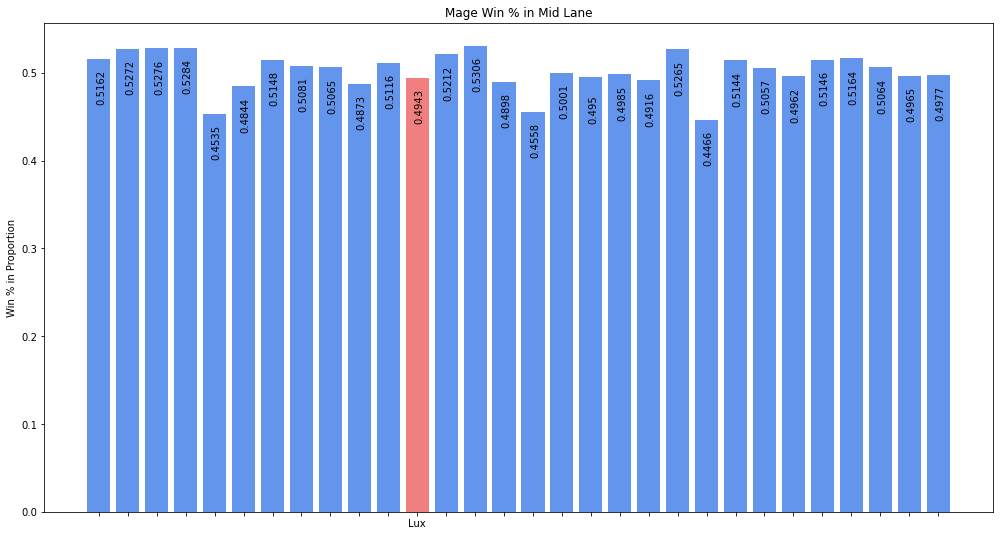

In [56]:
lol_4_mage = lol_4[lol_4['Class'] == 'Mage']
lol_4_mage_mid = lol_4_mage[lol_4_mage['Role'] == 'MID']
lol_4_mage_mid_win = lol_4_mage_mid['Win %'].values
lol_4_mage_mid_win = [ round(x, 4) for x in lol_4_mage_mid_win ]
#print(lol_4_mage_mid_win)
#print(len(lol_4_mage_mid_win))



colors = ['lightcoral' if (y == 0.4943) else 'cornflowerblue' for y in lol_4_mage_mid_win]
plt.figure(figsize = (17, 9))
ax = plt.subplot()

plt.bar(range(len(lol_4_mage_mid_win)), lol_4_mage_mid_win, color = colors)
for i, v in enumerate(lol_4_mage_mid_win):
    ax.text(i - 0.1, v - 0.05, str(v), size = 10, rotation = 90)

plt.title("Mage Win % in Mid Lane")
plt.ylabel("Win % in Proportion")

ax.set_xticks(range(len(lol_4_mage_mid_win)))
ax.set_xticklabels(['Lux' if (y == 0.4943) else '' for y in lol_4_mage_mid_win])

plt.savefig("mage_win_percent_mid_lane.png")
plt.show()

As the graph shows, there are many Mages in the Mid lane; about half of the champions have about 51 - 52% win rate, while the other half have about 48 - 49%. As you can see, in this patch (12.4) Lux has a lower Win % when in the Mid lane.

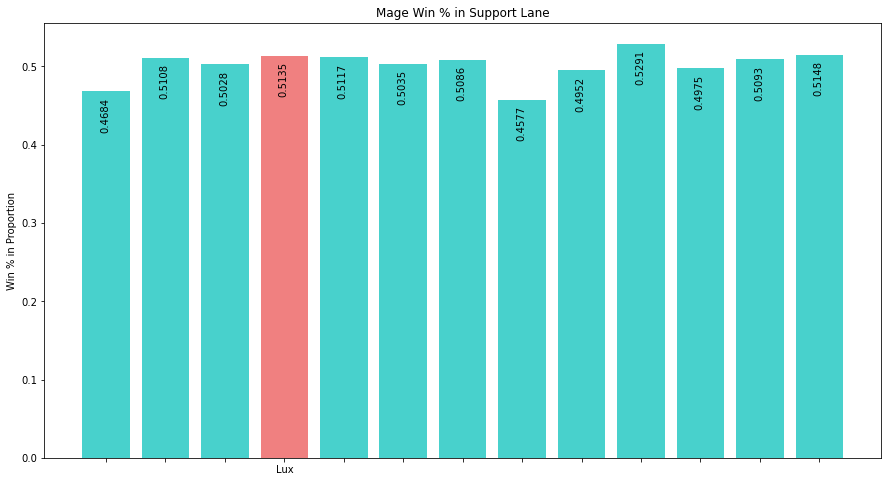

In [57]:
lol_4_mage_support = lol_4_mage[lol_4_mage['Role'] == 'SUPPORT']
lol_4_mage_support_win = lol_4_mage_support['Win %'].values
lol_4_mage_support_win = [ round(x, 4) for x in lol_4_mage_support_win ]
#print(lol_4_mage_support_win)
#print(len(lol_4_mage_support_win))


colors = ['lightcoral' if (y == 0.5135) else 'mediumturquoise' for y in lol_4_mage_support_win]
plt.figure(figsize = (15, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_mage_support_win)), lol_4_mage_support_win, color = colors)
for i, v in enumerate(lol_4_mage_support_win):
    ax.text(i - 0.1, v - 0.05, str(v), size = 10, rotation = 90)

plt.title("Mage Win % in Support Lane")
plt.ylabel("Win % in Proportion")

ax.set_xticks(range(len(lol_4_mage_support_win)))
ax.set_xticklabels(['Lux' if (y == 0.5135) else '' for y in lol_4_mage_support_win])

plt.savefig("mage_win_percent_support_lane.png")
plt.show()

The Win % for Lux in the Support lane is pretty well as it is the top 3 of all Mages in the Support lane; this would suggest that Lux would be a relatively good champion to be chosen for the Support lane.

<br>

Due to the developers creating the game this way, all champions will have a Win % relatively close to 50% to allow a 50% chance to win or to lose.

**[Return to Tasks](#tasks)**

## 2.2 In Akali's Pick %, Which in Top Lane, and Which in Mid Lane? <a id = 'question_2.2'></a>

In [47]:
lol_4['Pick %'] = lol_4['Pick %'].str.rstrip('%').astype('float') / 100

In [48]:
lol_4_akali = lol_4[lol_4['Name'] == 'Akali']
lol_4_akali.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
2,Akali,Assassin,TOP,A,48.25,-26.55,0.4807,27.03%,0.0321,18.30%,2.03
3,Akali,Assassin,MID,S,73.23,8.46,0.4998,72.36%,0.0931,18.30%,2.32


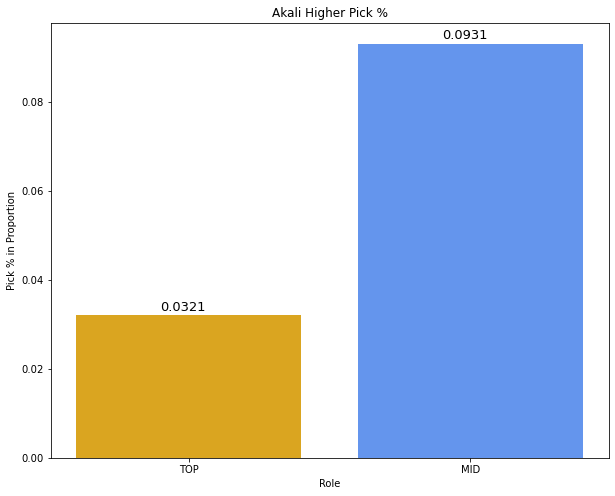

In [49]:
lol_4_akali_pick = lol_4_akali['Pick %'].values
lol_4_akali_pick = [ round(x, 4) for x in lol_4_akali_pick ]
#print(lol_4_akali_pick)



colors = ['goldenrod', 'cornflowerblue']
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(2), lol_4_akali_pick, color = colors)

plt.title("Akali Higher Pick %")
plt.ylabel("Pick % in Proportion")
plt.xlabel("Role")

ax.set_xticks(range(2))
ax.set_xticklabels(['TOP', 'MID'])
for i, v in enumerate(lol_4_akali_pick):
    ax.text(i - 0.1, v + 0.001, str(v), size = 13)

plt.savefig("akali_pick_percent.png")
plt.show()

Looking at Akali's Pick % by Role, Akali is chosen a lot more as a Mid laner at 9.3%, than a Top laner at 3.2%; however, it is important to remember that the numbers on this graph is actually a pretty low Pick % compared to other champions in other classes and roles.

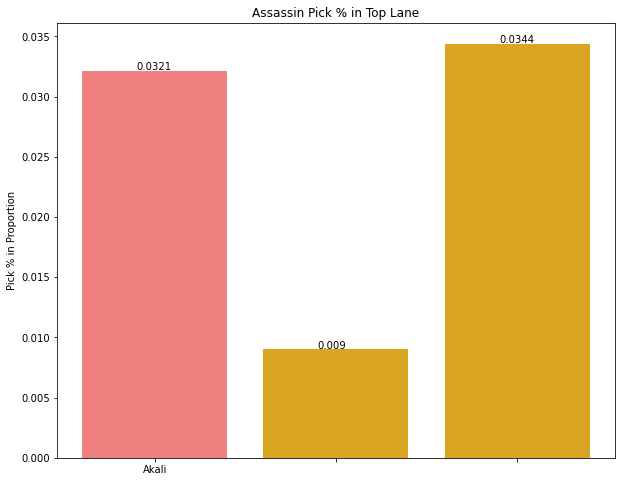

In [50]:
lol_4_assassin = lol_4[lol_4['Class'] == 'Assassin']
lol_4_assassin_top = lol_4_assassin[lol_4_assassin['Role'] == 'TOP']
lol_4_assassin_top_pick = lol_4_assassin_top['Pick %'].values
lol_4_assassin_top_pick = [ round(x, 4) for x in lol_4_assassin_top_pick ]
#print(lol_4_assassin_top_pick)
#print(len(lol_4_assassin_top_pick))


colors = ['lightcoral' if (y == 0.0321) else 'goldenrod' for y in lol_4_assassin_top_pick]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(3), lol_4_assassin_top_pick, color = colors)
for i, v in enumerate(lol_4_assassin_top_pick):
    ax.text(i - 0.1, v + 0.0001, str(v), size = 10)

plt.title("Assassin Pick % in Top Lane")
plt.ylabel("Pick % in Proportion")

ax.set_xticks(range(3))
ax.set_xticklabels(['Akali' if (y == 0.0321) else '' for y in lol_4_assassin_top_pick])

plt.savefig("assassin_pick_percent_top_lane.png")
plt.show()


In the Top lane, Akali's (light red) Pick % is in the top 2, however the numbers are still relatively low as Akali's Pick % is only 3.2% in the Top lane. This would indicate that most players would not pick Akali or the other Assassins to be a Top laner.

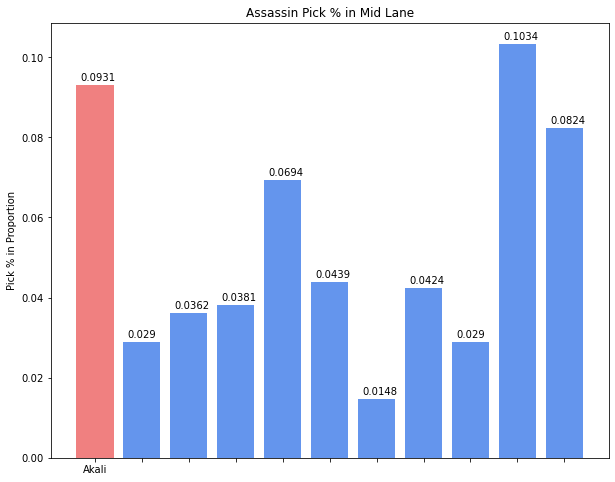

In [51]:
lol_4_assassin_mid = lol_4_assassin[lol_4_assassin['Role'] == 'MID']
lol_4_assassin_mid_pick = lol_4_assassin_mid['Pick %'].values
lol_4_assassin_mid_pick = [ round(x, 4) for x in lol_4_assassin_mid_pick ]
#print(lol_4_assassin_mid_pick)
#print(len(lol_4_assassin_mid_pick))


colors = ['lightcoral' if (y == 0.0931) else 'cornflowerblue' for y in lol_4_assassin_mid_pick]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(11), lol_4_assassin_mid_pick, color = colors)
for i, v in enumerate(lol_4_assassin_mid_pick):
    ax.text(i - 0.3, v + 0.001, str(v), size = 10)

plt.title("Assassin Pick % in Mid Lane")
plt.ylabel("Pick % in Proportion")

ax.set_xticks(range(11))
ax.set_xticklabels(['Akali' if (y == 0.0931) else '' for y in lol_4_assassin_mid_pick])

plt.savefig("assassin_pick_percent_mid_lane.png")
plt.show()


Based on the overall graph of Mid lane Assassins and their Pick %, Akali is also in the top 2 of being picked as a Mid lane Assassin. This suggests that Akali does really well in the Mid lane, therefore a lot of players will pick Akali if they choose to be an Assassin and be in the Mid lane.

**[Return to Tasks](#tasks)**

## 2.3 Pick % of Alistar compared to his Ban %? <a id = 'question_2.3'></a>

In [52]:
lol_4['Ban %'] = lol_4['Ban %'].str.rstrip('%').astype('float') / 100

In [53]:
lol_4_alistar = lol_4[lol_4['Name'] == 'Alistar']
lol_4_alistar.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
6,Alistar,Tank,SUPPORT,B,42.58,-0.42,0.483,96.47%,0.0282,0.0062,2.46


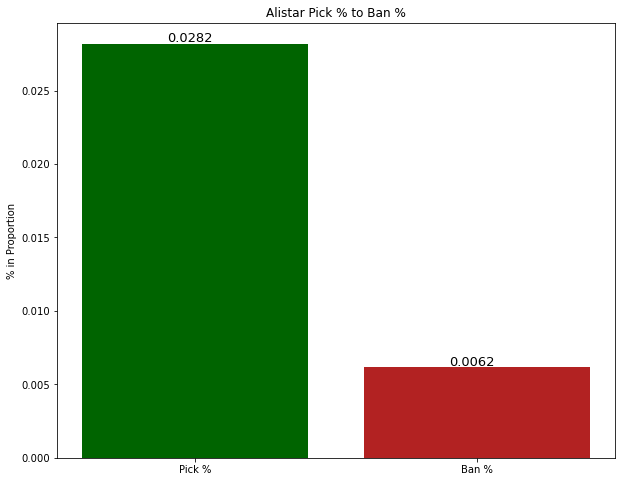

In [54]:
lol_4_alistar_pick = lol_4_alistar['Pick %']
lol_4_alistar_ban = lol_4_alistar['Ban %']

lol_4_alistar_pick_ban = []
for pick, ban in zip(lol_4_alistar_pick, lol_4_alistar_ban):
    #print(pick)
    #print(ban)
    lol_4_alistar_pick_ban.append(pick)
    lol_4_alistar_pick_ban.append(ban)
#print(lol_4_alistar_pick_ban)


colors = ['darkgreen', 'firebrick']
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(2), lol_4_alistar_pick_ban, color = colors)

plt.title("Alistar Pick % to Ban %")
plt.ylabel("% in Proportion")

ax.set_xticks(range(2))
ax.set_xticklabels(['Pick %', 'Ban %'])
for i, v in enumerate(lol_4_alistar_pick_ban):
    ax.text(i - 0.1, v + 0.0001, str(v), size = 13)

plt.savefig("alistar_pick_ban_percent.png")
plt.show()


Looking at Alistar's Pick % to Ban %, it would seem like Alistar is picked exponentially more than being banned; however, the numbers only indicate that Alistar is picked only 2.8% of the time which is actually not a lot. So because the Pick % is so low for Alistar, so is the Ban % because 0.62%.

In [55]:
lol_4_tank = lol_4[lol_4['Class'] == 'Tank']
lol_4_tank.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
6,Alistar,Tank,SUPPORT,B,42.58,-0.42,0.4830,96.47%,0.0282,0.0062,2.46
7,Amumu,Tank,JUNGLE,A,51.68,6.73,0.5297,87.85%,0.0314,0.0147,2.60
8,Amumu,Tank,SUPPORT,B,42.65,13.35,0.5114,19.12%,0.0035,0.0145,2.07
17,Blitzcrank,Tank,SUPPORT,S,59.84,-14.42,0.5216,97.42%,0.0775,0.2049,2.48
20,Braum,Tank,SUPPORT,C,40.10,-0.61,0.4712,96.85%,0.0206,0.0040,2.65


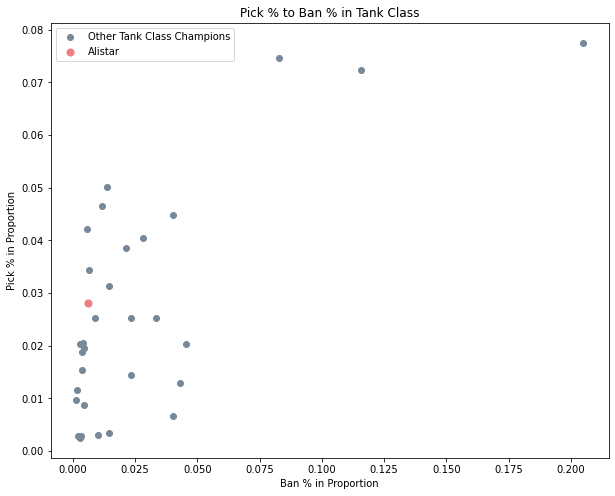

In [56]:
lol_4_tank_pick = lol_4_tank['Pick %'].values
#print(lol_4_tank_pick)

lol_4_tank_ban = lol_4_tank['Ban %'].values
#print(lol_4_tank_ban)

plt.figure(figsize = (10, 8))
plt.scatter(lol_4_tank_ban, lol_4_tank_pick, color = 'lightslategray', label = 'Other Tank Class Champions')
plt.scatter(lol_4_alistar_ban, lol_4_alistar_pick, color = 'lightcoral', label = 'Alistar', s = 50)

plt.title("Pick % to Ban % in Tank Class")
plt.ylabel("Pick % in Proportion")
plt.xlabel("Ban % in Proportion")

plt.legend()

plt.savefig("pick_ban_percent_tank_class.png")
plt.show()

The Pick % for Alistar (light red) in the Tank class is very low, nearly 3% of players pick Alistar to be a Tank; and because the Pick % is so low for Alister, the Ban % is pretty much non-existent.

In [57]:
lol_4_support = lol_4[lol_4['Role'] == 'SUPPORT']
lol_4_support.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
6,Alistar,Tank,SUPPORT,B,42.58,-0.42,0.4830,96.47%,0.0282,0.0062,2.46
8,Amumu,Tank,SUPPORT,B,42.65,13.35,0.5114,19.12%,0.0035,0.0145,2.07
10,Anivia,Mage,SUPPORT,C,35.06,3.87,0.4684,12.50%,0.0042,0.0298,2.12
16,Bard,Controller,SUPPORT,A,49.38,5.85,0.5104,95.01%,0.0270,0.0059,2.95
17,Blitzcrank,Tank,SUPPORT,S,59.84,-14.42,0.5216,97.42%,0.0775,0.2049,2.48


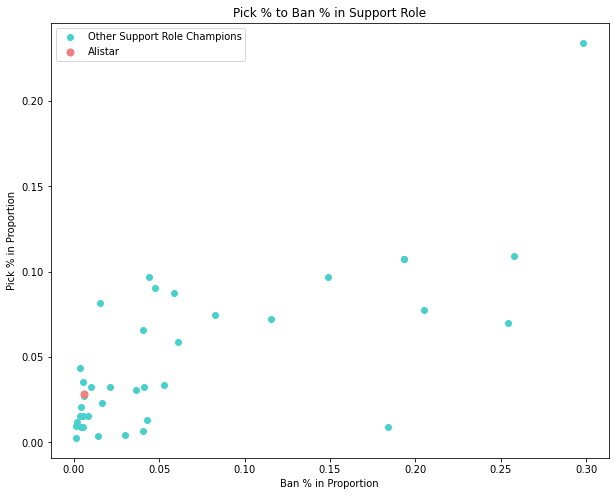

In [58]:
lol_4_support_pick = lol_4_support['Pick %'].values
#print(lol_4_support_pick)

lol_4_support_ban = lol_4_support['Ban %'].values
#print(lol_4_support_ban)

plt.figure(figsize = (10, 8))
plt.scatter(lol_4_support_ban, lol_4_support_pick, color = 'mediumturquoise', label = 'Other Support Role Champions')
plt.scatter(lol_4_alistar_ban, lol_4_alistar_pick, color = 'lightcoral', label = 'Alistar', s = 50)

plt.title("Pick % to Ban % in Support Role")
plt.ylabel("Pick % in Proportion")
plt.xlabel("Ban % in Proportion")

plt.legend()

plt.savefig("pick_ban_percent_support_role.png")
plt.show()

Just like the graph on the Tank class, the Pick % to Ban % in the Support role is relatively small in both for Alistar. This means that Alistar is picked about 2 - 3% of the time to be in the Support lane, and because the Pick % is so small already, Alistar is rarely ever banned (which is why the Ban % is so low).

**[Return to Tasks](#tasks)**

# 2.4 Akshan's Role % of Top Lane and Mid Lane? <a id = 'question_2.4'></a>

In [61]:
lol_4['Role %'] = lol_4['Role %'].str.rstrip('%').astype('float') / 100

In [62]:
lol_4_akshan = lol_4[lol_4['Name'] == "Akshan"]
lol_4_akshan.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
4,Akshan,Marksman,MID,A,51.30,-3.12,0.4925,0.6641,0.0444,0.159,2.14
5,Akshan,Marksman,TOP,B,47.16,6.59,0.5285,0.2744,0.0175,0.159,1.93


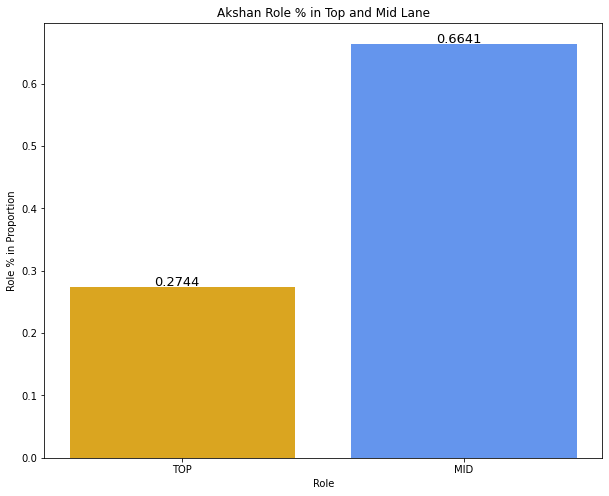

In [72]:
lol_4_akshan_top = lol_4_akshan[lol_4_akshan['Role'] == 'TOP']
lol_4_akshan_top_role = lol_4_akshan_top['Role %'].values
#print(lol_4_akshan_top_role)

lol_4_akshan_mid = lol_4_akshan[lol_4_akshan['Role'] == 'MID']
lol_4_akshan_mid_role = lol_4_akshan_mid['Role %'].values
#print(lol_4_akshan_mid_role)

lol_4_akshan_role = []
for top, mid in zip(lol_4_akshan_top_role, lol_4_akshan_mid_role):
    lol_4_akshan_role.append(round(top, 4))
    lol_4_akshan_role.append(round(mid, 4))
#print(lol_4_akshan_role)



colors = ['goldenrod', 'cornflowerblue']
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(2), lol_4_akshan_role, color = colors)

plt.title("Akshan Role % in Top and Mid Lane")
plt.ylabel("Role % in Proportion")
plt.xlabel("Role")

ax.set_xticks(range(2))
ax.set_xticklabels(['TOP', 'MID'])
for i, v in enumerate(lol_4_akshan_role):
    ax.text(i - 0.1, v + 0.001, str(v), size = 13)

plt.savefig("akshan_role_percent.png")
plt.show()

Based off this graph, if the player had to choose Akshan as their champion, they would have a better chance of doing relatively well in the game if they chose Akshan as a Mid laner rather than a Top laner.

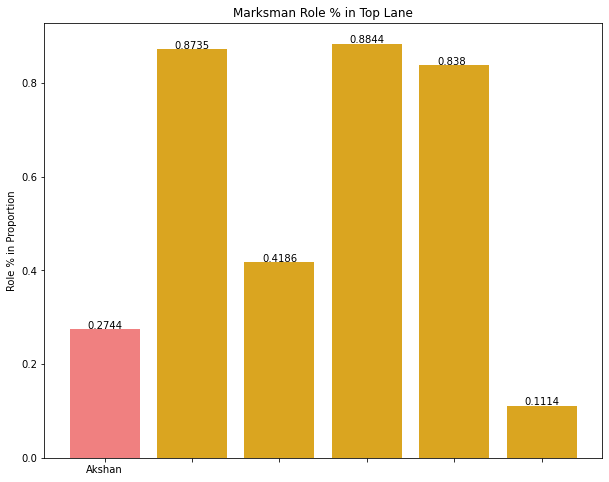

In [76]:
lol_4_marksman = lol_4[lol_4['Class'] == 'Marksman']
lol_4_marksman_top = lol_4_marksman[lol_4_marksman['Role'] == 'TOP']
lol_4_marksman_top_role = lol_4_marksman_top['Role %'].values
lol_4_marksman_top_role = [ round(x, 4) for x in lol_4_marksman_top_role ]
#print(lol_4_marksman_top_role)
#print(len(lol_4_marksman_top_role))

colors = ['lightcoral' if (y == 0.2744) else 'goldenrod' for y in lol_4_marksman_top_role]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_marksman_top_role)), lol_4_marksman_top_role, color = colors)
for i, v in enumerate(lol_4_marksman_top_role):
    ax.text(i - 0.2, v + 0.001, str(v), size = 10)

plt.title("Marksman Role % in Top Lane")
plt.ylabel("Role % in Proportion")

ax.set_xticks(range(len(lol_4_marksman_top_role)))
ax.set_xticklabels(['Akshan' if (y == 0.2744) else '' for y in lol_4_marksman_top_role])

plt.savefig("marksman_role_percent_top_lane.png")
plt.show()


In this graph 'Marksman Role % in Top Lane', Akshan (light red) is part of the bottom 2 to be chosen for this role. This means that the top 3 Marksman would be better options as a Top laner than Akshan would be.

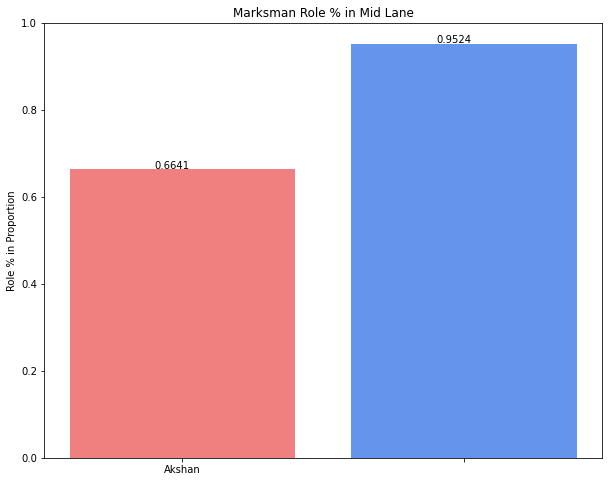

In [92]:
lol_4_marksman_mid = lol_4_marksman[lol_4_marksman['Role'] == 'MID']
lol_4_marksman_mid_role = lol_4_marksman_mid['Role %'].values
lol_4_marksman_mid_role = [ round(x, 4) for x in lol_4_marksman_mid_role ]
#print(lol_4_marksman_mid_role)
#print(len(lol_4_marksman_mid_role))


colors = ['lightcoral' if (y == 0.6641) else 'cornflowerblue' for y in lol_4_marksman_mid_role]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_marksman_mid_role)), lol_4_marksman_mid_role, color = colors)
for i, v in enumerate(lol_4_marksman_mid_role):
    ax.text(i - 0.1, v + 0.001, str(v), size = 10)

plt.title("Marksman Role % in Mid Lane")
plt.ylabel("Role % in Proportion")

ax.set_xticks(range(len(lol_4_marksman_mid_role)))
ax.set_xticklabels(['Akshan' if (y == 0.6641) else '' for y in lol_4_marksman_mid_role])

plt.savefig("marksman_role_percent_mid_lane.png")
plt.show()

As you can see from the 'Marksman Role % in Mid Lane', there is only one other Marksman as a Mid laner other than Akshan; and based off this graph, the other Marksman champion is picked to be as a Mid laner more than Akshan.

**[Return to Tasks](#tasks)**

## 2.5 Ekko's Higher KDA In Jungle Lane or Mid Lane? <a id = 'question_2.5'></a>

In [82]:
lol_4_ekko = lol_4[lol_4['Name'] == 'Ekko']
lol_4_ekko.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
33,Ekko,Assassin,JUNGLE,S,59.62,5.13,0.5195,0.6438,0.057,0.0346,2.76
34,Ekko,Assassin,MID,A,47.82,1.87,0.5066,0.3384,0.029,0.0346,2.30


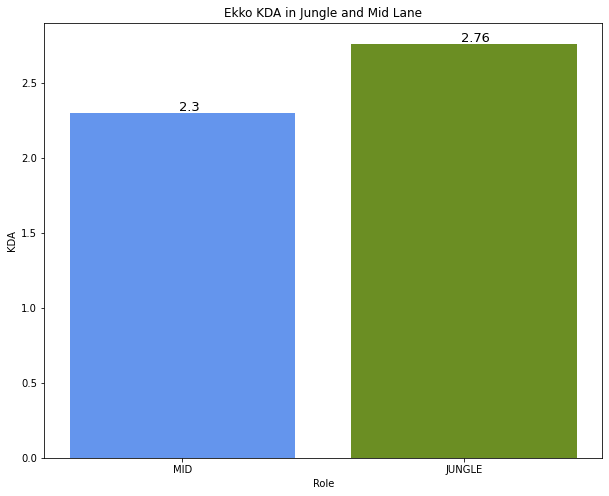

In [89]:
lol_4_ekko_jungle = lol_4_ekko[lol_4_ekko['Role'] == 'JUNGLE']
lol_4_ekko_jungle_kda = lol_4_ekko_jungle['KDA'].values
#print(lol_4_ekko_jungle_kda)

lol_4_ekko_mid = lol_4_ekko[lol_4_ekko['Role'] == 'MID']
lol_4_ekko_mid_kda = lol_4_ekko_mid['KDA'].values
#print(lol_4_ekko_mid_kda)

lol_4_ekko_kda = []
for mid, jungle in zip(lol_4_ekko_mid_kda, lol_4_ekko_jungle_kda):
    lol_4_ekko_kda.append(mid)
    lol_4_ekko_kda.append(jungle)
#print(lol_4_ekko_kda)


colors = ['cornflowerblue', 'olivedrab']
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_ekko_kda)), lol_4_ekko_kda, color = colors)

plt.title("Ekko KDA in Jungle and Mid Lane")
plt.ylabel("KDA")
plt.xlabel("Role")

ax.set_xticks(range(len(lol_4_ekko_kda)))
ax.set_xticklabels(['MID', 'JUNGLE'])
for i, v in enumerate(lol_4_ekko_kda):
    ax.text(i - 0.01, v + 0.01, str(v), size = 13)

plt.savefig("ekko_kda_mid_jungle.png")
plt.show()

Comparing Ekko's Mid lane KDA, and Jungle lane KDA; Ekko's Jungle KDA is much higher, meaning it would be more worth it to pick Ekko if the player wanted to choose an Assassin, and be a Jungle laner.

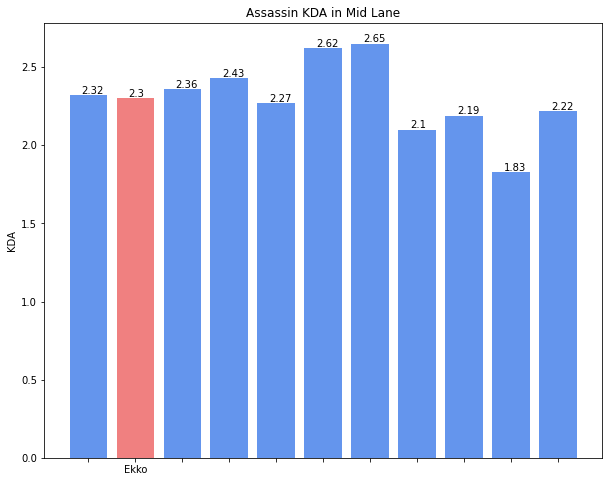

In [98]:
lol_4_assassin_mid = lol_4_assassin[lol_4_assassin['Role'] == 'MID']
lol_4_assassin_mid_kda = lol_4_assassin_mid['KDA'].values
#print(lol_4_assassin_mid_kda)
#print(len(lol_4_assassin_mid_kda))


colors = ['lightcoral' if (y == 2.3) else 'cornflowerblue' for y in lol_4_assassin_mid_kda]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_assassin_mid_kda)), lol_4_assassin_mid_kda, color = colors)
for i, v in enumerate(lol_4_assassin_mid_kda):
    ax.text(i - 0.15, v + 0.01, str(v), size = 10)

plt.title("Assassin KDA in Mid Lane")
plt.ylabel("KDA")

ax.set_xticks(range(len(lol_4_assassin_mid_kda)))
ax.set_xticklabels(['Ekko' if (y == 2.3) else '' for y in lol_4_assassin_mid_kda])

plt.savefig("assassin_kda_mid_lane.png")
plt.show()


The 'Assassin KDA in Mid Lane' graph takes all the Assassins in the Mid Lane and compares all their KDAs. In this graph, Ekko (light red) has a relatively average KDA score compared to the rest of the graph. Ekko might not be the best pick as a Mid Lane Assassin as there are higher KDA scores.

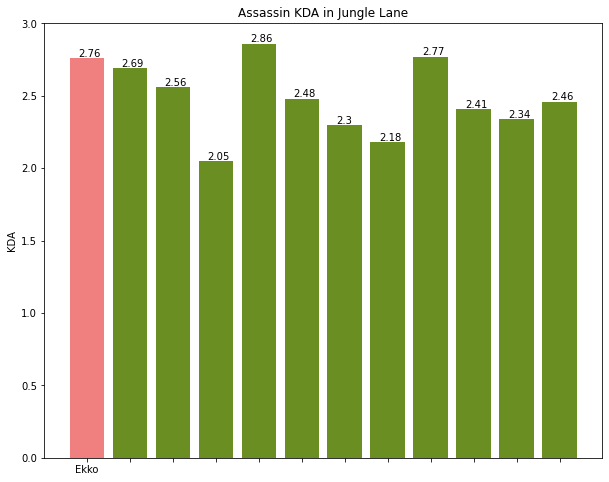

In [101]:
lol_4_assassin_jungle = lol_4_assassin[lol_4_assassin['Role'] == 'JUNGLE']
lol_4_assassin_jungle_kda = lol_4_assassin_jungle['KDA'].values
#print(lol_4_assassin_jungle_kda)
#print(len(lol_4_assassin_jungle_kda))


colors = ['lightcoral' if (y == 2.76) else 'olivedrab' for y in lol_4_assassin_jungle_kda]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_assassin_jungle_kda)), lol_4_assassin_jungle_kda, color = colors)
for i, v in enumerate(lol_4_assassin_jungle_kda):
    ax.text(i - 0.2, v + 0.01, str(v), size = 10)

plt.title("Assassin KDA in Jungle Lane")
plt.ylabel("KDA")

ax.set_xticks(range(len(lol_4_assassin_jungle_kda)))
ax.set_xticklabels(['Ekko' if (y == 2.76) else '' for y in lol_4_assassin_jungle_kda])

plt.savefig("assassin_kda_jungle_lane.png")
plt.show()

The 'Assassin KDA in Jungle Lane' graph looks at all the Assassins in the Jungle lane and compares the KDA. Ekko has a relatively high KDA score (top 3) compared to the rest of the Assassins.

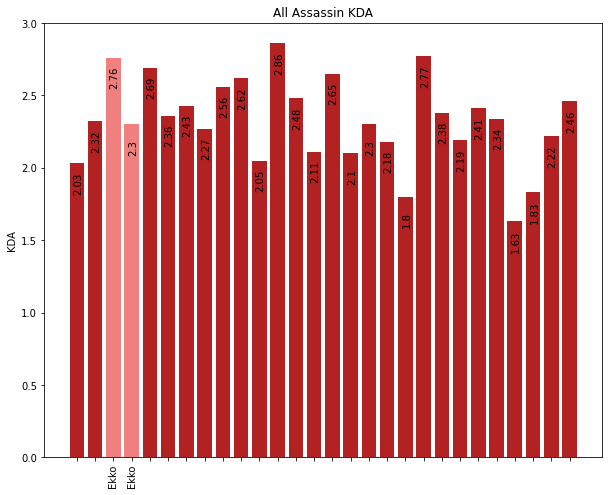

In [117]:
lol_4_assassin_name = lol_4_assassin['Name'].values
lol_4_assassin_kda = lol_4_assassin['KDA'].values
#print(lol_4_assassin_kda)
#print(len(lol_4_assassin_kda))



colors = ['lightcoral' if (y == 'Ekko') else 'firebrick' for y in lol_4_assassin_name]
plt.figure(figsize = (10, 8))
ax = plt.subplot()

plt.bar(range(len(lol_4_assassin_kda)), lol_4_assassin_kda, color = colors)
for i, v in enumerate(lol_4_assassin_kda):
    ax.text(i - 0.2, v - 0.2, str(v), size = 10, rotation = 90)

plt.title("All Assassin KDA")
plt.ylabel("KDA")

ax.set_xticks(range(len(lol_4_assassin_kda)))
ax.set_xticklabels(['Ekko' if (y == 'Ekko') else '' for y in lol_4_assassin_name], rotation = 90)

plt.savefig("all_assassin_kda.png")
plt.show()

This 'All Assassin KDA' graph compares all the Assassin's KDA to Ekko's KDA results regardless of the lane/role.

<br>

Based off all 4 graphs, Ekko has a relatively good KDA score for both the Mid and Jungle lane (with Jungle lane being better). This would suggest that if the champion Ekko were to be picked, the player would have a higher chance of winning if Ekko was in the Jungle lane.

**[Return to Tasks](#tasks)**

<hr>

# 3. Possibilites and Assumptions:

## 3.1 Find the Average KDA for All Classes, and Compare to the Average KDA of Tank class. <a id = 'question_3.1'></a>

Let's look at the Statistics of the Tank Class' KDA first.

In [81]:
lol_4_tank = lol_4[lol_4['Class'] == 'Tank']
#lol_4_tank.head()

lol_4_tank_kda = lol_4_tank['KDA'].values

In [92]:
print("Tank Class Data:")
print("")

lol_4_kda_std = np.std(lol_4['KDA'].values)
#print(lol_4_kda_std)

lol_4_tank_kda_avg = lol_4_tank_kda.mean()
print("Mean: " + str(lol_4_tank_kda_avg))

lol_4_tank_std = np.std(lol_4_tank_kda, ddof = 1)
print("Standard Deviation: " + str(lol_4_tank_std))

lol_4_tank_std_error = lol_4_kda_std / (len(lol_4_tank_kda) ** 0.5)
print("Standard Error: " + str(lol_4_tank_std_error))

lol_4_tank_95_percentile = np.percentile(lol_4_tank_kda, [2.5, 97.5]) #this finds 95% within the graph
#print(lol_4_tank_95_percentile)
print("This shows that 95% of the graph for Tank class has KDA between 1.863 to 3.28975")

print("")

lol_4_tank_first_quartile = np.quantile(lol_4_tank_kda, 0.25)
print("Q1: " + str(lol_4_tank_first_quartile))

lol_4_tank_second_quartile = np.quantile(lol_4_tank_kda, 0.50)
print("Q2: " + str(lol_4_tank_second_quartile))

lol_4_tank_third_quartile = np.quantile(lol_4_tank_kda, 0.75)
print("Q3: " + str(lol_4_tank_third_quartile))

lol_4_tank_interquartile = iqr(lol_4_tank_kda)
print("Interquartile Range: " + str(lol_4_tank_interquartile))

lol_4_tank_lower = lol_4_tank_first_quartile - (1.5 * lol_4_tank_interquartile)
print("Lower Fence: " + str(lol_4_tank_lower))

lol_4_tank_upper = lol_4_tank_third_quartile + (1.5 * lol_4_tank_interquartile)
print("Upper Fence: " + str(lol_4_tank_upper))


Tank Class Data:

Mean: 2.4521875
Standard Deviation: 0.405014809565949
Standard Error: 0.071514178610587
This shows that 95% of the graph for Tank class has KDA between 1.863 to 3.28975

Q1: 2.2025
Q2: 2.41
Q3: 2.655
Interquartile Range: 0.4524999999999997
Lower Fence: 1.5237500000000006
Upper Fence: 3.3337499999999993


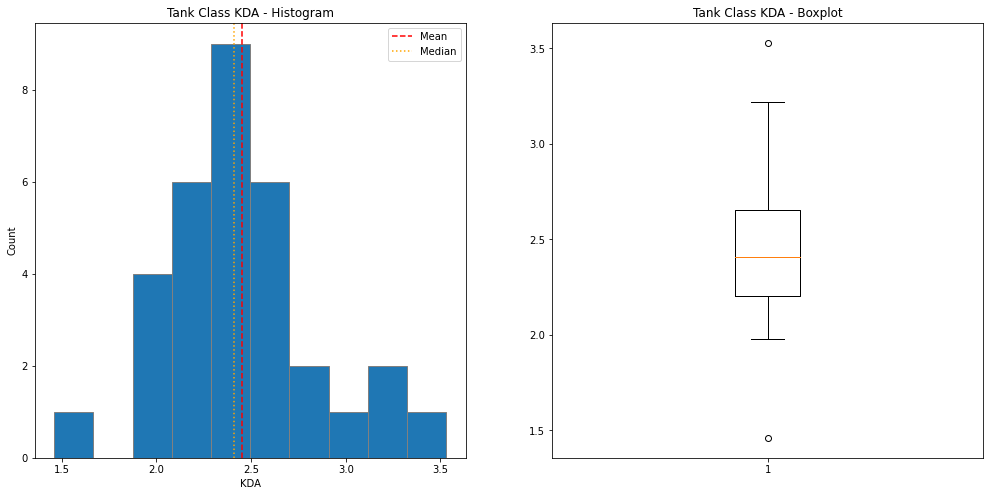

Plots are slightly skewed right because the mean is larger an the median


In [151]:
plt.figure(figsize = (17, 8))
ax1 = plt.subplot(1, 2, 1)
plt.hist(lol_4_tank_kda, edgecolor = 'gray')
plt.axvline(lol_4_tank_kda_avg, color = 'red', linestyle = 'dashed', label = 'Mean')
plt.axvline(lol_4_tank_second_quartile, color = 'orange', linestyle = 'dotted', label = 'Median')

ax1.set_title("Tank Class KDA - Histogram")
plt.xlabel("KDA")
plt.ylabel("Count")
plt.legend()


ax2 = plt.subplot(1, 2, 2)
plt.boxplot(lol_4_tank_kda)

ax2.set_title("Tank Class KDA - Boxplot")

plt.savefig("tank_kda_histogram_boxplot.png")
plt.show()

print("Plots are slightly skewed right because the mean is larger an the median")

<br>

In [96]:
lol_4_kda = lol_4['KDA'].values
#print(lol_4_kda)

lol_4_kda_avg = lol_4_kda.mean()
print(lol_4_kda_avg)

2.311071428571428


We want to know if the average KDA for the Tank Class is 2.311 or not.

$H_{0}: \mu = 2.311 $
<br>

$H_{1}: \mu \neq 2.311
$

In [97]:
tstat, pval = ttest_1samp(lol_4_tank_kda, 2.311)
print("p-value: " + str(pval))

p-value: 0.05759229868996925


The p-value describes the the likelihood of seeing the sample mean (2.45) over the population mean (2.311). Since the p-value is greater than 0.05 at 0.058, we will not reject the null hypothesis. This means that there is about 5.8 chances out of 100 that the mean is 2.311.

**[Return to Tasks](#tasks)**

## 3.2 Association Between Roles and Classes? <a id = 'question_3.2'></a>

We want to see if there's an association between the classes, and the type of roles they are in.

$H_{0}:$ association between roles and classes 
<br>

$H_{1}:$ no association between roles and classes


In [98]:
table = pd.crosstab(lol_4['Class'], lol_4['Role'])
print(table)

Role        ADC  JUNGLE  MID  SUPPORT  TOP
Class                                     
Assassin      0      12   11        2    3
Controller    0       1    1       10    0
Fighter       2      21    7        1   34
Mage          5       4   30       13    4
Marksman     20       2    2        1    6
Tank          0       7    3       12   10


In [104]:
chi2, pval, dof, expected = chi2_contingency(table)
print("p-value: {:.39f}".format(float(pval)))

p-value: 0.000000000000000000000000000000000001310


As we can see from the p-value above, the null hypothesis is rejected, and the value is statistically significant. This would suggest that there is absolutely no association between the types of roles and classes.

**[Return to Tasks](#tasks)**

## 3.3 In the Support Lane, is it more likely for a Mage or Tank to be picked? <a id = 'question_3.3'></a>

Let's first find the Baseline Conversion Rate, Minimum Detectable Effect, and Significance Threshold for the Mage class.

In [116]:
lol_4_support = lol_4[lol_4['Role'] == 'SUPPORT']
lol_4_support.head()
#print(len(lol_4_support))

lol_4_support_mage = lol_4_support[lol_4_support['Class'] == 'Mage']
#print(len(lol_4_support_mage))


baseline = ((len(lol_4_support_mage) / len(lol_4_support)) * 100)
print("Baseline: " + str(round(baseline, 4)) + "%")

Baseline: 33.3333%


Suppose that 33.3333% of players will choose the Mage class to be in the Support lane, so we are thinking of creating a couple more Mage champions for the Support lane, but it may be worth to do if at least 35% of players were to choose Mage champions in the Support role.

In [115]:
#baseline = 33.3333%
new_baseline = 35 #35%

min_detectable_effect = (((new_baseline - baseline) / baseline) * 100)
print("Minimum Detectable Effect: " + str(round(min_detectable_effect, 4)) + "%")

Minimum Detectable Effect: 5.0%


This significance threshold is the false positive rate for the test. 95% is the most common to use, therefore, we will use it too.

<br>

Through an external sample size calculator for this A/B Test, we will need at least <b>11,000 players</b>. Now, to get the probabilities of players that will pick either Mage or Tank in the 12.4 patch, we will need to take the number of Mage champions in Support, and divide it by the total number of Support roles (this is the baseline); and do the same with the Tank champions as well.

In [124]:
lol_4_support_tank = lol_4_support[lol_4_support['Class'] == 'Tank']
lol_4_support_tank_prob = ((len(lol_4_support_tank) / len(lol_4_support)) * 100)

print("Percent of Mage Champions in Support: " + str(round(baseline)) + "%")
print("Percent of Tank Champions in Support: " + str(round(lol_4_support_tank_prob)) + "%")

Percent of Mage Champions in Support: 33%
Percent of Tank Champions in Support: 31%


We can now use the probabilites to simulate a dataset of 11,000 players:

In [127]:
sample_support_mage = np.random.choice(['Yes', 'No'], size = 5500, p = [0.33, 0.67])
sample_support_tank = np.random.choice(['Yes', 'No'], size = 5500, p = [0.31, 0.69])


group = ['Mage'] * 5500 + ['Tank'] * 5500
outcome = list(sample_support_mage) + list(sample_support_tank)

sim_data = {"Class": group, "Chosen?" : outcome}
sim_data = pd.DataFrame(sim_data)
sim_data.head()

,Class,Chosen?
0,Mage,No
1,Mage,No
2,Mage,Yes
3,Mage,No
4,Mage,Yes


Let's see what the simulated data looks like in a pie chart and histogram so we can see how many players would choose Mage or Tank, theoretically.

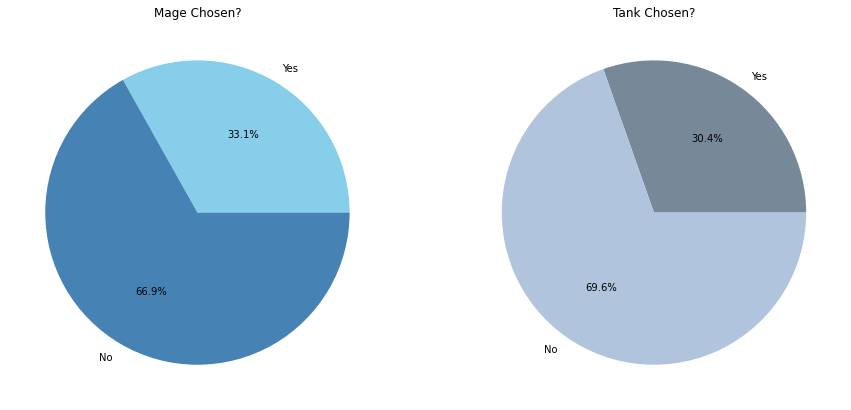

In [152]:
sim_data_mage = sim_data[sim_data['Class'] == 'Mage']
sim_data_mage_chosen = sim_data_mage[sim_data_mage['Chosen?'] == 'Yes']
#print(len(sim_data_mage_chosen))
sim_data_mage_not_chosen = sim_data_mage[sim_data_mage['Chosen?'] == 'No']

sim_data_tank = sim_data[sim_data['Class'] == 'Tank']
sim_data_tank_chosen = sim_data_tank[sim_data_tank['Chosen?'] == 'Yes']
#print(len(sim_data_tank_chosen))
sim_data_tank_not_chosen = sim_data_tank[sim_data_tank['Chosen?'] == 'No']


plt.figure(figsize = (15, 8))
ax1 = plt.subplot(1, 2, 1)
plt.pie([len(sim_data_mage_chosen), len(sim_data_mage_not_chosen)], labels = ['Yes', 'No'], autopct = '%0.1f%%', 
        colors = ['skyblue', 'steelblue'])
plt.title("Mage Chosen?")

ax2 = plt.subplot(1, 2, 2)
plt.pie([len(sim_data_tank_chosen), len(sim_data_tank_not_chosen)], labels = ['Yes', 'No'], autopct = '%0.1f%%', 
        colors = ['lightslategray', 'lightsteelblue'])
plt.title("Tank Chosen?")

plt.savefig("mage_tank_chosen.png")
plt.show()

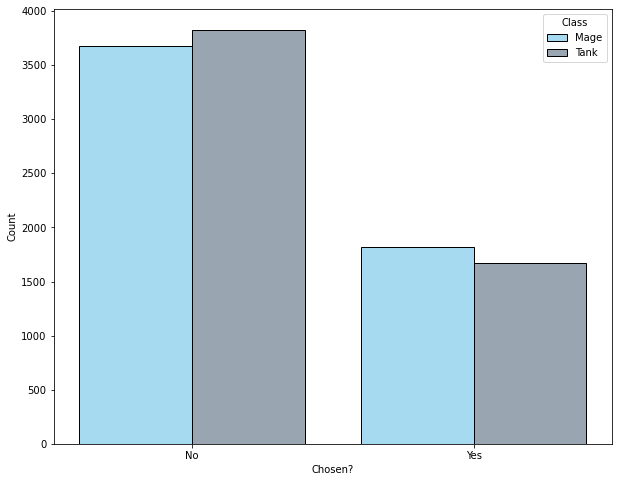

In [153]:
plt.figure(figsize = (10, 8))
sns.histplot(data = sim_data, x = 'Chosen?', hue = 'Class', multiple = 'dodge', shrink = 0.8, palette = ['#87ceeb', '#778899'])

plt.savefig('mage_tank_chosen_histogram.png')
plt.show()

So we can see that with running the A/B test, it is more likely that choosing either a Mage or Tank in the support class will be 'No'; however, the Mage is more likely to get chosen over the Tank if in a Support role. Therefore, it may not be worth it to create new Mage champions in the Support class as they're not likely to get chosen.

**[Return to Tasks](#tasks)**

## 3.4 Different Types of Classes Better than One Another Based on Scores? <a id = 'question_3.4'></a>

The independent variable is class type, which has 'Fighter', 'Assassin', 'Mage', 'Marksman', 'Controller', and 'Tank'; and we want to find out if there's a difference in score.

$H_{0}:$ there is no difference to the population mean
<br>

$H_{1}:$ there is at least one class that differs significantly from the overall mean


In [149]:
lol_4_fighter = lol_4[lol_4['Class'] == 'Fighter']
lol_4_fighter_scores = lol_4_fighter['Score'].values

lol_4_assassin = lol_4[lol_4['Class'] == 'Assassin']
lol_4_assassin_scores = lol_4_assassin['Score'].values

lol_4_mage = lol_4[lol_4['Class'] == 'Mage']
lol_4_mage_scores = lol_4_mage['Score'].values

lol_4_marksman = lol_4[lol_4['Class'] == 'Marksman']
lol_4_marksman_scores = lol_4_marksman['Score'].values

lol_4_controller = lol_4[lol_4['Class'] == 'Controller']
lol_4_controller_scores = lol_4_controller['Score'].values

lol_4_tank = lol_4[lol_4['Class'] == 'Tank']
lol_4_tank_scores = lol_4_tank['Score'].values


fstat, pval = f_oneway(lol_4_fighter_scores, lol_4_assassin_scores, lol_4_mage_scores, lol_4_marksman_scores, 
                       lol_4_controller_scores, lol_4_tank_scores)
print("p-value: " + str(pval))

p-value: 0.17958878647853557


Due to the p-value being greater than 0.05, we will not reject the null hypothesis. This means that each of the classes' scores are similar to the overall population mean.

**[Return to Tasks](#tasks)**

<hr>

[<sup id="fn1">1</sup>](#fn1-back) Description about League of Legends was created by *[Wikipedia](https://en.wikipedia.org/wiki/League_of_Legends)*.

[<sup id="fn2">2</sup>](#fn2-back) Class descriptions are from *[Dignitas: Classifying Classes - A Guide to Understanding Champion Classes in League of Legends](https://dignitas.gg/articles/blogs/League-of-Legends/15071/classifying-classes-a-guide-to-understanding-champion-classes-in-league-of-legends)*.

[<sup id="fn3">3</sup>](#fn3-back) Lane/Role descriptions are from *[League of Legends Wiki](https://leagueoflegends.fandom.com/wiki/Lanes)*.

[<sup id="fn4">4</sup>](#fn4-back) Dataset patches 12.1, 12.2, and 12.3 is created by Vivo Vinco; which was retrieved from *[Kaggle](https://www.kaggle.com/vivovinco/league-of-legends-champion-stats/version/3?select=League+of+Legends+Champion+Stats+12.3.csv)*.
Dataset patch 12.4 was retrieved from *[MetaSrc](https://www.metasrc.com/5v5/stats)*.
These datasets include all ranks.